In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import rc, rcParams
rc('text', usetex=True)
rc('axes', linewidth=1.5)
rc('axes', labelweight='bold')
rc('axes',labelsize=20)
rc('axes.formatter',min_exponent=0)
rc('font', weight='bold')
rc('font', size=16)
rc('xtick',direction='in')
rc('ytick',direction='in')
rc('xtick.major',width=1)
rc('ytick.major',width=1)
rc('xtick.major',size=6)
rc('ytick.major',size=6)
rc('xtick.minor',visible=True)
rc('ytick.minor',visible=True)
rc('xtick.minor',size=3)
rc('ytick.minor',size=3)
rc('xaxis',labellocation='right')
rc('yaxis',labellocation='top')
rc('lines',linewidth='2')
rcParams['text.latex.preamble'] = r'\usepackage{sfmath} \boldmath'


In [2]:
#    JLab 1: S=10.3 GeV2, Q=1.52 GeV, x=0.32, z=0.55
#    JLab 2: Eb=12 GeV, Q2=8 GeV2, x=0.48, z=0.375
#    JLab 3: Eb=24 GeV, Q2=15 GeV2, x=0.48, z=0.375
#    EIC 1: sqrt(S)=140 GeV, Q=3 GeV, y=0.4, z=0.5
#    EIC 2: sqrt(S)=140 GeV, Q=10 GeV, y=0.4, z=0.5
#    EIC 3: sqrt(S)=140 GeV, Q=5 GeV, x=0.01, z=0.5
#    qt_to_Q = PhT/z/Q

def Get_error(value1,error1,value2,error2):
    ratios=[]
    ratios_err=[]
    for i in range(0,len(value1)):
        ratio = value1[i]/value2[i]
        ratio_err = ratio*math.sqrt((error1[i]/value1[i])**2+(error2[i]/value2[i])**2)
        ratios.append(ratio)
        ratios_err.append(ratio_err)
    return ratios,ratios_err
    #return value1/value2,(value1/value2)*math.sqrt((error1/value1)**2+(error2/value2)**2)

In [3]:
filename = 'exc_compare/Tra-results/Exc/JLab2'
filename_JLab3 = 'exc_compare/Tra-results/Exc/JLab3'
column_names=['q2','x','z','pt2','sumsibs/sumsib','sumsigsi/sumsigi','sumsigst/sumsigt','sumsibc/sumsib','sumsigci/sumsigi','sumsigct/sumsigt','sumsib','sumsigi','sumsigt','sumsibs','sumsigsi','sumsigst','sumsibc','sumsigci','sumsigct']
column_names=['q2','x','z','pt2','r1','r2','r3','r4','r5','r6','sumsib','sumsigi','sumsigt','sumsibs','sumsigsi','sumsigst','sumsibc','sumsigci','sumsigct']

df_JLab2_sasha=pd.read_csv(filename,delim_whitespace=True,names=column_names)
df_JLab2_sasha.head()


,q2,x,z,pt2,r1,r2,r3,r4,r5,r6,sumsib,sumsigi,sumsigt,sumsibs,sumsigsi,sumsigst,sumsibc,sumsigci,sumsigct
0,8.0,0.48,0.375,0.0225,0.004492,0.004435,0.004467,0.001785,0.001758,0.001738,201.18,190.68,190.77,0.90376,0.84560,0.85223,0.35906,0.33518,0.33152
1,8.0,0.48,0.375,0.0289,0.005161,0.005098,0.005136,0.002000,0.001966,0.001943,195.77,185.64,185.73,1.01030,0.94637,0.95392,0.39163,0.36506,0.36081
2,8.0,0.48,0.375,0.0361,0.005732,0.005657,0.005701,0.002290,0.002251,0.002223,189.87,180.12,180.21,1.08840,1.01900,1.02740,0.43477,0.40541,0.40061
3,8.0,0.48,0.375,0.0441,0.006382,0.006308,0.006357,0.002551,0.002510,0.002478,183.52,174.17,174.27,1.17120,1.09860,1.10790,0.46813,0.43716,0.43184
4,8.0,0.48,0.375,0.0529,0.006933,0.006849,0.006905,0.002761,0.002713,0.002677,176.78,167.86,167.96,1.22560,1.14970,1.15970,0.48813,0.45542,0.44961


In [4]:
df_JLab3_sasha=pd.read_csv(filename_JLab3,delim_whitespace=True,names=column_names)
df_JLab3_sasha.head()

,q2,x,z,pt2,r1,r2,r3,r4,r5,r6,sumsib,sumsigi,sumsigt,sumsibs,sumsigsi,sumsigst,sumsibc,sumsigci,sumsigct
0,15.0,0.48,0.375,0.079102,0.008662,0.008561,0.008578,0.003055,0.002987,0.002982,73.460,68.979,68.992,0.63631,0.59054,0.59179,0.22439,0.20605,0.20576
1,15.0,0.48,0.375,0.101600,0.007409,0.007168,0.007188,0.003522,0.003441,0.003436,66.748,62.772,62.785,0.49452,0.44997,0.45128,0.23511,0.21597,0.21569
2,15.0,0.48,0.375,0.126910,0.011023,0.010838,0.010860,0.003678,0.003645,0.003641,59.941,56.472,56.485,0.66074,0.61206,0.61344,0.22046,0.20586,0.20564
3,15.0,0.48,0.375,0.155040,0.011051,0.010869,0.010894,0.004809,0.004780,0.004775,53.186,50.216,50.229,0.58775,0.54577,0.54718,0.25578,0.24001,0.23983
4,15.0,0.48,0.375,0.185980,0.012074,0.011881,0.011911,0.005883,0.005797,0.005791,46.629,44.123,44.137,0.56300,0.52422,0.52569,0.27432,0.25579,0.25561


In [5]:
def Get_qt_to_q_from_pt2(q2,z,pt2):
    pt=np.sqrt(pt2)
    qt_to_q2 = pt/z/np.sqrt(q2)
    return qt_to_q2

In [6]:
pt2_jlab2 = df_JLab2_sasha['pt2'].to_list()
qt_to_q_jlab2 = Get_qt_to_q_from_pt2(8,0.375,pt2_jlab2)
print(qt_to_q_jlab2)

[0.14142136 0.16027754 0.17913372 0.1979899  0.21684608 0.23570226
 0.25455844 0.27341462 0.2922708  0.31112698 0.32998316 0.34883935
 0.36769553 0.38655171 0.40540789 0.42426407 0.44312025 0.46197643
 0.48083261 0.49968879 0.51854497 0.53740115 0.55625733 0.57511352
 0.5939697  0.61282588 0.63168206 0.65053824 0.66939442 0.6882506
 0.70710678 0.72596296 0.74481914 0.76367532 0.7825315  0.80138769
 0.82024387 0.83910005 0.85795623 0.87681241 0.89566859 0.91452477
 0.93338095 0.95223713 0.97109331 0.98994949 1.00880567 1.02766186
 1.04651804 1.06537422 1.0842304  1.10308658 1.12194276 1.14079894
 1.15965512 1.1785113  1.19736748 1.21622366 1.23507984 1.25393603
 1.27279221 1.29164839 1.31050457 1.32936075 1.34821693]


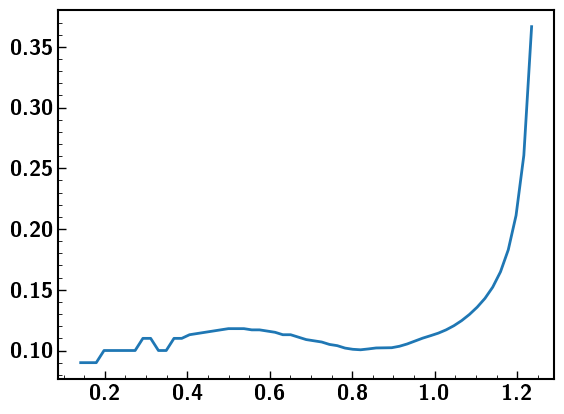

In [7]:
exc_jlab2 = df_JLab2_sasha['sumsigt']-df_JLab2_sasha['sumsigi']
plt.plot(qt_to_q_jlab2,exc_jlab2)

In [8]:
pt2_jlab3 = df_JLab3_sasha['pt2'].to_list()
qt_to_q_jlab3 = Get_qt_to_q_from_pt2(15,0.375,pt2_jlab3)
print(qt_to_q_jlab3)

[0.1936497  0.21946737 0.24528502 0.27110965 0.29693147 0.32275114
 0.34856914 0.37438582 0.40020735 0.4260273  0.45184593 0.47766841
 0.50348945 0.52930926 0.55512801 0.58094584 0.60676678 0.63258669
 0.65840571 0.68422738 0.71005477 0.73585828 0.76169013 0.78751743
 0.81334062 0.83916007 0.86497613 0.89078908 0.91659919 0.94243184
 0.96823627 0.99406237 1.01988525]


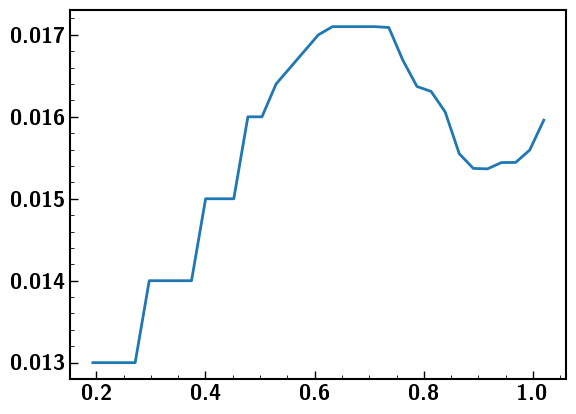

In [9]:
exc_jlab3 = df_JLab3_sasha['sumsigt']-df_JLab3_sasha['sumsigi']
plt.plot(qt_to_q_jlab3,exc_jlab3)

In [10]:
exc_jlab2_siv = df_JLab2_sasha['sumsigst']-df_JLab2_sasha['sumsigsi']
print(exc_jlab2_siv)
exc_jlab2_col = df_JLab2_sasha['sumsigct']-df_JLab2_sasha['sumsigci']
print(exc_jlab2_col)

0     0.00663
1     0.00755
2     0.00840
3     0.00930
4     0.01000
       ...   
60        NaN
61        NaN
62        NaN
63        NaN
64        NaN
Length: 65, dtype: float64
0    -0.00366
1    -0.00425
2    -0.00480
3    -0.00532
4    -0.00581
       ...   
60        NaN
61        NaN
62        NaN
63        NaN
64        NaN
Length: 65, dtype: float64


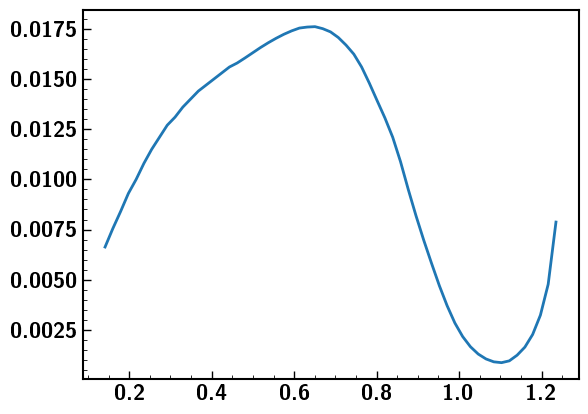

In [11]:
plt.plot(qt_to_q_jlab2,exc_jlab2_siv)


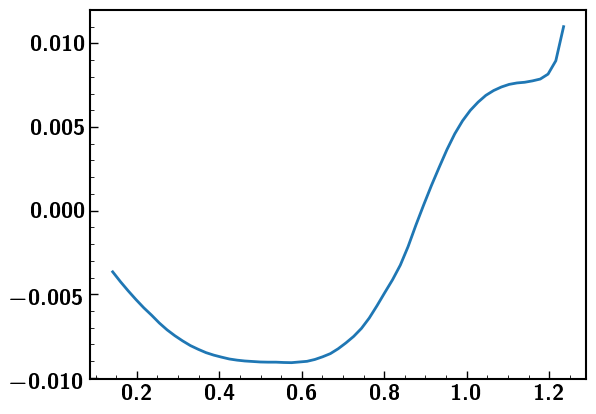

In [12]:
plt.plot(qt_to_q_jlab2,exc_jlab2_col)


In [13]:
exc_jlab3_siv = df_JLab3_sasha['sumsigst']-df_JLab3_sasha['sumsigsi']
print(exc_jlab3_siv)
exc_jlab3_col = df_JLab3_sasha['sumsigct']-df_JLab3_sasha['sumsigci']
print(exc_jlab3_col)

0     0.001250
1     0.001310
2     0.001380
3     0.001410
4     0.001470
5     0.001540
6     0.001670
7     0.001760
8     0.001920
9     0.002010
10    0.002120
11    0.002200
12    0.002300
13    0.002390
14    0.002500
15    0.002597
16    0.002692
17    0.002827
18    0.002876
19    0.002901
20    0.002867
21    0.002826
22    0.002603
23    0.002398
24    0.002180
25    0.001905
26    0.001571
27    0.001400
28    0.001121
29    0.000872
30    0.000629
31    0.000408
32    0.000191
dtype: float64
0    -0.000290
1    -0.000280
2    -0.000220
3    -0.000180
4    -0.000180
5    -0.000220
6    -0.000300
7    -0.000390
8    -0.000480
9    -0.000570
10   -0.000640
11   -0.000720
12   -0.000777
13   -0.000879
14   -0.000977
15   -0.001079
16   -0.001141
17   -0.001289
18   -0.001349
19   -0.001389
20   -0.001352
21   -0.001349
22   -0.001216
23   -0.001093
24   -0.000904
25   -0.000681
26   -0.000418
27   -0.000281
28   -0.000075
29    0.000143
30    0.000351
31    0.000511
32    0.00

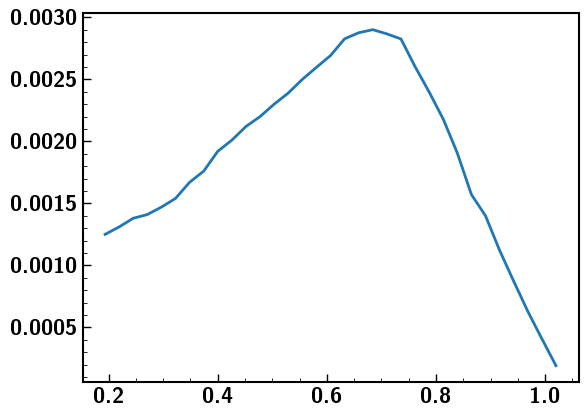

In [14]:
plt.plot(qt_to_q_jlab3,exc_jlab3_siv)

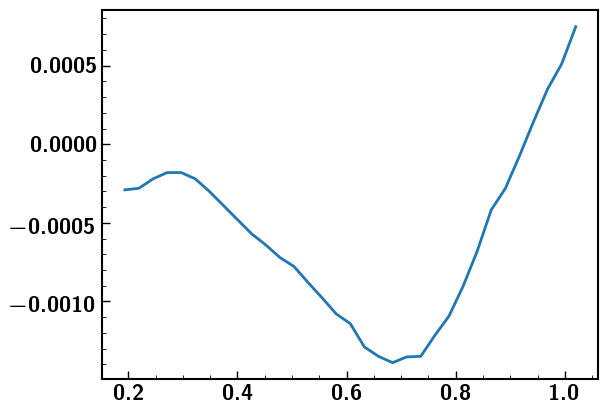

In [15]:
plt.plot(qt_to_q_jlab3,exc_jlab3_col)

In [16]:
df_T_jlab3_unpol = pd.read_csv('results/Tra-results/results-fine/results/jlab3-unpol.txt',delim_whitespace=True)
df_T_jlab3_unpol.columns=['qt_to_Q','unpol_bn','unpol_bn_err','unpol_rc','unpol_rc_err','sivers_bn','sivers_bn_err','sivers_rc','sivers_rc_err','collins_bn','collins_bn_err','collins_rc','collins_rc_err']
df_T_jlab3_unpol.head()
df_T_jlab3_siv = pd.read_csv('results/Tra-results/results-fine/results/jlab3-siv.txt',delim_whitespace=True)
df_T_jlab3_siv.columns=['qt_to_Q','unpol_bn','unpol_bn_err','unpol_rc','unpol_rc_err','sivers_bn','sivers_bn_err','sivers_rc','sivers_rc_err','collins_bn','collins_bn_err','collins_rc','collins_rc_err']
df_T_jlab3_siv.head()
df_T_jlab3_col = pd.read_csv('results/Tra-results/results-fine/results/jlab3-col.txt',delim_whitespace=True)
df_T_jlab3_col.columns=['qt_to_Q','unpol_bn','unpol_bn_err','unpol_rc','unpol_rc_err','sivers_bn','sivers_bn_err','sivers_rc','sivers_rc_err','collins_bn','collins_bn_err','collins_rc','collins_rc_err']
df_T_jlab3_col.head()

,qt_to_Q,unpol_bn,unpol_bn_err,unpol_rc,unpol_rc_err,sivers_bn,sivers_bn_err,sivers_rc,sivers_rc_err,collins_bn,collins_bn_err,collins_rc,collins_rc_err
0,0.050000,0.0,0.0,0.0,0.0,-9.923445e-14,2.690789e-13,1.014509e-09,1.027368e-10,1.345441e-07,2.195126e-23,1.242801e-07,1.079883e-10
1,0.059732,0.0,0.0,0.0,0.0,-1.171806e-13,3.177401e-13,1.233860e-09,1.057959e-10,1.588755e-07,1.934628e-23,1.467806e-07,1.126636e-10
2,0.069463,0.0,0.0,0.0,0.0,-1.344224e-13,3.644923e-13,1.477930e-09,1.102541e-10,1.822525e-07,1.717848e-23,1.684179e-07,1.178714e-10
3,0.079195,0.0,0.0,0.0,0.0,-1.508643e-13,4.090762e-13,1.710661e-09,1.157045e-10,2.045452e-07,1.462104e-23,1.890560e-07,1.234100e-10
4,0.088926,0.0,0.0,0.0,0.0,-1.664194e-13,4.512543e-13,1.902223e-09,1.218717e-10,2.256350e-07,1.241682e-23,2.085930e-07,1.280201e-10


In [17]:
df_T_jlab2_unpol = pd.read_csv('results/Tra-results/results-fine/results/jlab2-unpol.txt',delim_whitespace=True)
df_T_jlab2_unpol.columns=['qt_to_Q','unpol_bn','unpol_bn_err','unpol_rc','unpol_rc_err','sivers_bn','sivers_bn_err','sivers_rc','sivers_rc_err','collins_bn','collins_bn_err','collins_rc','collins_rc_err']
df_T_jlab2_unpol.head()
df_T_jlab2_siv = pd.read_csv('results/Tra-results/results-fine/results/jlab2-siv.txt',delim_whitespace=True)
df_T_jlab2_siv.columns=['qt_to_Q','unpol_bn','unpol_bn_err','unpol_rc','unpol_rc_err','sivers_bn','sivers_bn_err','sivers_rc','sivers_rc_err','collins_bn','collins_bn_err','collins_rc','collins_rc_err']
df_T_jlab2_siv.head()
df_T_jlab2_col = pd.read_csv('results/Tra-results/results-fine/results/jlab2-col.txt',delim_whitespace=True)
df_T_jlab2_col.columns=['qt_to_Q','unpol_bn','unpol_bn_err','unpol_rc','unpol_rc_err','sivers_bn','sivers_bn_err','sivers_rc','sivers_rc_err','collins_bn','collins_bn_err','collins_rc','collins_rc_err']
df_T_jlab2_col.head()

,qt_to_Q,unpol_bn,unpol_bn_err,unpol_rc,unpol_rc_err,sivers_bn,sivers_bn_err,sivers_rc,sivers_rc_err,collins_bn,collins_bn_err,collins_rc,collins_rc_err
0,0.050000,0.0,0.0,0.0,0.0,-1.168907e-13,3.169540e-13,5.008954e-10,1.044600e-10,1.584825e-07,3.179393e-23,1.487246e-07,1.112258e-10
1,0.059732,0.0,0.0,0.0,0.0,-1.387847e-13,3.763217e-13,6.217221e-10,1.092959e-10,1.881674e-07,2.590268e-23,1.766683e-07,1.185557e-10
2,0.069463,0.0,0.0,0.0,0.0,-1.602315e-13,4.344758e-13,8.006761e-10,1.137948e-10,2.172454e-07,2.282189e-23,2.039887e-07,1.250610e-10
3,0.079195,0.0,0.0,0.0,0.0,-1.811643e-13,4.912361e-13,9.437156e-10,1.196565e-10,2.456266e-07,2.006832e-23,2.305906e-07,1.313988e-10
4,0.088926,0.0,0.0,0.0,0.0,-2.015195e-13,5.464298e-13,1.112475e-09,1.261363e-10,2.732244e-07,1.794043e-23,2.565656e-07,1.367738e-10


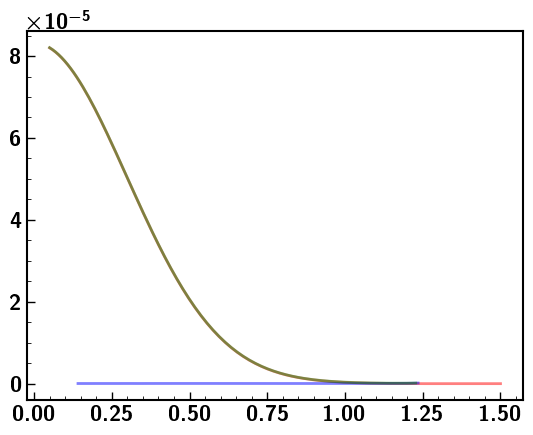

In [18]:
import numpy as np
from scipy.interpolate import interp1d
Factor = 0.389379e6*2*np.pi
# Define your grids and values
x_jlab2 = df_T_jlab2_unpol['qt_to_Q']   # Grid for A
jlab2 = df_T_jlab2_unpol['unpol_rc'] # Example values for A

x_jlab2_exc = qt_to_q_jlab2 # Grid for B
jlab2_exc =  exc_jlab2/Factor  # Example values for B

# Interpolate B onto the grid of A
interpolator = interp1d(x_jlab2_exc, jlab2_exc, kind='linear', fill_value='extrapolate')
jlab2_exc_interpolated = interpolator(x_jlab2)

# Subtract B from A
result = jlab2 + jlab2_exc_interpolated

# Print or plot the result
#print("Result:", result)
plt.plot(x_jlab2,jlab2,'r',alpha=0.5,label='rc')
plt.plot(x_jlab2_exc,jlab2_exc,'b',alpha=0.5,label='exc')
plt.plot(x_jlab2,result,'g',alpha=0.5,label='corr')

Text(1, 0, 'Pt')

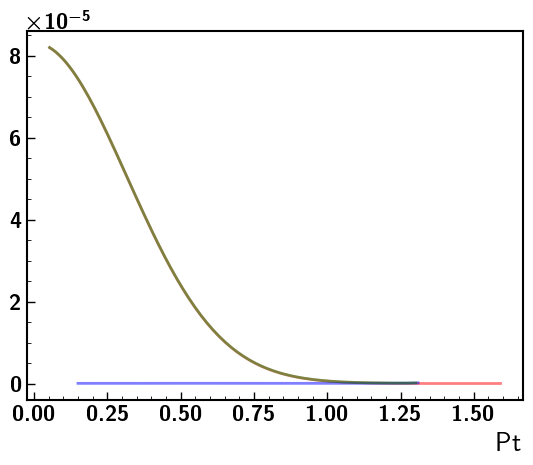

In [19]:

# Print or plot the result
#print("Result:", result)
plt.plot(x_jlab2*0.375*np.sqrt(8),jlab2,'r',alpha=0.5,label='rc')
plt.plot(x_jlab2_exc*0.375*np.sqrt(8),jlab2_exc,'b',alpha=0.5,label='exc')
plt.plot(x_jlab2*0.375*np.sqrt(8),result,'g',alpha=0.5,label='corr')
plt.xlabel("Pt")

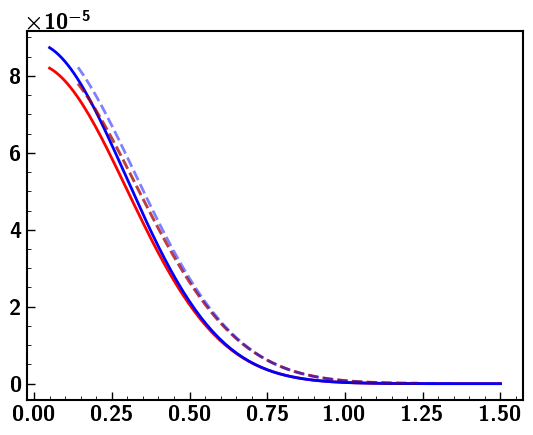

In [20]:
#check born
jlab2_qt_to_q = df_T_jlab2_unpol['qt_to_Q'] 
jlab2_rc = df_T_jlab2_unpol['unpol_rc'] 
jlab2_bn = df_T_jlab2_unpol['unpol_bn']
plt.plot(jlab2_qt_to_q,jlab2_rc,'r',label='T rc')
plt.plot(jlab2_qt_to_q,jlab2_bn,'b',label='T bn')

#from fortran
jlab2_fortran_qt_to_q = qt_to_q_jlab2#df_JLab2_sasha['pt2']
jlab2_fortran_rc = df_JLab2_sasha['sumsigt']/Factor
jlab2_fortran_rc_noexc = df_JLab2_sasha['sumsigi']/Factor
jlab2_fortran_bn = df_JLab2_sasha['sumsib']/Factor
plt.plot(jlab2_fortran_qt_to_q,jlab2_fortran_rc_noexc,'k',alpha=0.5,linestyle='--')
plt.plot(jlab2_fortran_qt_to_q,jlab2_fortran_rc,'r',alpha=0.5,linestyle='--')
plt.plot(jlab2_fortran_qt_to_q,jlab2_fortran_bn,'b',alpha=0.5,linestyle='--')
#df_JLab2_sasha['sumsigsi']

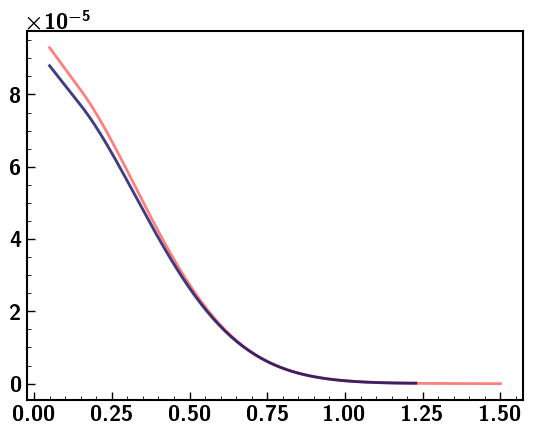

In [21]:
jlab2_fortran_bn = df_JLab2_sasha['sumsib']/Factor
interpolator = interp1d(x_jlab2_exc, jlab2_fortran_bn, kind='linear', fill_value='extrapolate')
jlab2_fortran_bn_interpolated = interpolator(x_jlab2)
plt.plot(x_jlab2,jlab2_fortran_bn_interpolated,'r',alpha=0.5)

jlab2_fortran_rc_noexc = df_JLab2_sasha['sumsigi']/Factor
interpolator = interp1d(x_jlab2_exc, jlab2_fortran_rc_noexc, kind='linear', fill_value='extrapolate')
jlab2_fortran_rc_noexc_interpolated = interpolator(x_jlab2)
plt.plot(x_jlab2,jlab2_fortran_rc_noexc_interpolated,'b',alpha=0.5)

jlab2_fortran_rc = df_JLab2_sasha['sumsigt']/Factor
interpolator = interp1d(x_jlab2_exc, jlab2_fortran_rc, kind='linear', fill_value='extrapolate')
jlab2_fortran_rc_interpolated = interpolator(x_jlab2)
plt.plot(x_jlab2,jlab2_fortran_rc_interpolated,'k',alpha=0.5)


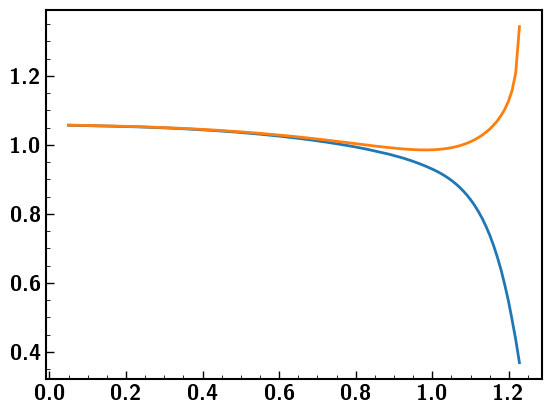

In [22]:
plt.plot(x_jlab2,jlab2_fortran_bn_interpolated/jlab2_fortran_rc_interpolated)
plt.plot(x_jlab2,jlab2_fortran_bn_interpolated/jlab2_fortran_rc_noexc_interpolated)



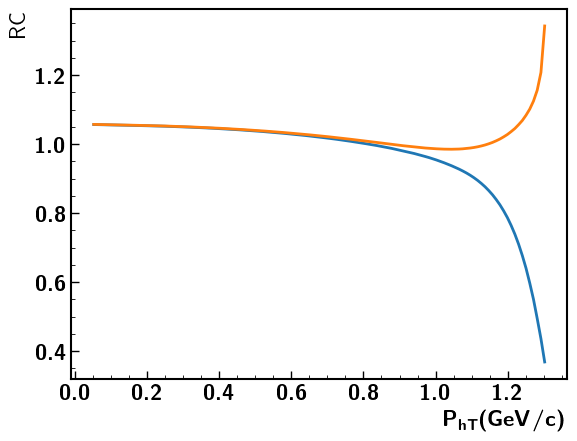

In [23]:
plt.plot(x_jlab2*0.375*np.sqrt(8),jlab2_fortran_bn_interpolated/jlab2_fortran_rc_interpolated)
plt.plot(x_jlab2*0.375*np.sqrt(8),jlab2_fortran_bn_interpolated/jlab2_fortran_rc_noexc_interpolated)

plt.ylabel('RC',fontsize=16)
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.savefig('results/compare/Fine/fortran_exc_rc_jlab2_Pt.pdf')


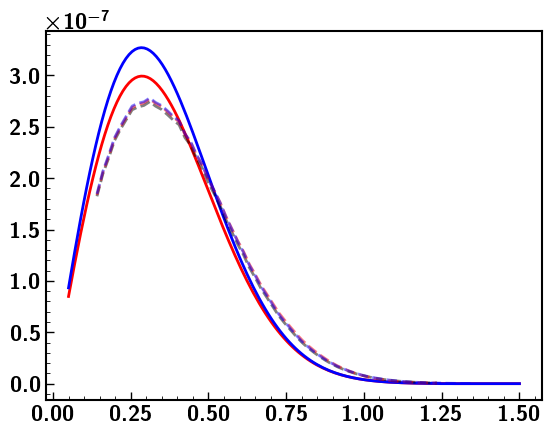

In [24]:
#check born
jlab2siv_qt_to_q = df_T_jlab2_siv['qt_to_Q'] 
jlab2siv_rc = df_T_jlab2_siv['sivers_rc'] 
jlab2siv_bn = df_T_jlab2_siv['sivers_bn']
plt.plot(jlab2siv_qt_to_q,jlab2siv_rc,'r',label='T siv rc')
plt.plot(jlab2siv_qt_to_q,jlab2siv_bn,'b',label='T siv bn')

#from fortran
jlab2siv_fortran_qt_to_q = qt_to_q_jlab2#df_JLab2_sasha['pt2']
jlab2siv_fortran_rc = df_JLab2_sasha['r3']*df_JLab2_sasha['sumsib']/Factor/2
jlab2siv_fortran_rc_noexc = df_JLab2_sasha['r2']*df_JLab2_sasha['sumsib']/Factor/2
jlab2siv_fortran_bn = df_JLab2_sasha['r1']*df_JLab2_sasha['sumsib']/Factor/2
plt.plot(jlab2siv_fortran_qt_to_q,jlab2siv_fortran_rc_noexc,'k',alpha=0.5,linestyle='--')
plt.plot(jlab2siv_fortran_qt_to_q,jlab2siv_fortran_rc,'r',alpha=0.5,linestyle='--')
plt.plot(jlab2siv_fortran_qt_to_q,jlab2siv_fortran_bn,'b',alpha=0.5,linestyle='--')
#df_JLab2_sasha['sumsigsi']

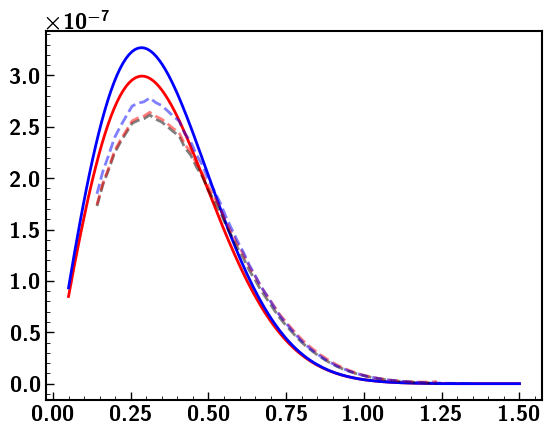

In [25]:
#check born
jlab2siv_qt_to_q = df_T_jlab2_siv['qt_to_Q'] 
jlab2siv_rc = df_T_jlab2_siv['sivers_rc'] 
jlab2siv_bn = df_T_jlab2_siv['sivers_bn']
plt.plot(jlab2siv_qt_to_q,jlab2siv_rc,'r',label='T siv rc')
plt.plot(jlab2siv_qt_to_q,jlab2siv_bn,'b',label='T siv bn')

#from fortran
jlab2siv_fortran_qt_to_q = qt_to_q_jlab2#df_JLab2_sasha['pt2']
jlab2siv_fortran_rc = df_JLab2_sasha['sumsigst']/Factor/2
jlab2siv_fortran_rc_noexc = df_JLab2_sasha['sumsigsi']/Factor/2
jlab2siv_fortran_bn = df_JLab2_sasha['sumsibs']/Factor/2
plt.plot(jlab2siv_fortran_qt_to_q,jlab2siv_fortran_rc_noexc,'k',alpha=0.5,linestyle='--')
plt.plot(jlab2siv_fortran_qt_to_q,jlab2siv_fortran_rc,'r',alpha=0.5,linestyle='--')
plt.plot(jlab2siv_fortran_qt_to_q,jlab2siv_fortran_bn,'b',alpha=0.5,linestyle='--')
#df_JLab2_sasha['sumsigsi']

Text(1, 0, 'qt/Q')

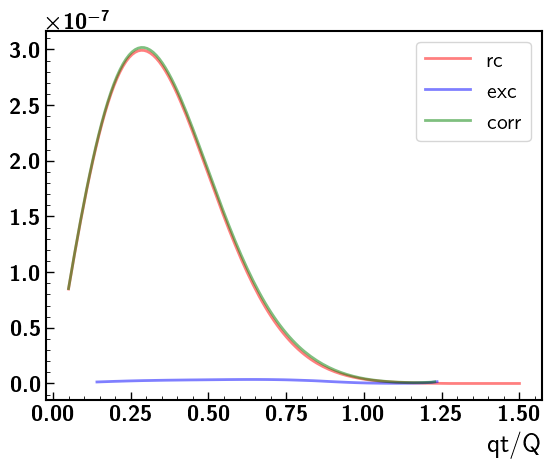

In [26]:
x_jlab2siv = df_T_jlab2_siv['qt_to_Q']   # Grid for A
jlab2siv = df_T_jlab2_siv['sivers_rc'] # Example values for A
#plt.plot(np.asarray(df_T_jlab2_siv['qt_to_Q']),df_T_jlab2_siv['sivers_rc'],color='b',label='Traditional rc')

x_jlab2siv_exc = qt_to_q_jlab2 # Grid for B
jlab2siv_exc =  exc_jlab2_siv/Factor/2  # Example values for B

# Interpolate B onto the grid of A
interpolator = interp1d(x_jlab2siv_exc, jlab2siv_exc, kind='linear', fill_value='extrapolate')
jlab2siv_exc_interpolated = interpolator(x_jlab2siv)

# Subtract B from A
result = jlab2siv + jlab2siv_exc_interpolated

# Print or plot the result
#print("Result:", result)
plt.plot(x_jlab2siv,jlab2siv,'r',alpha=0.5,label='rc')
plt.plot(x_jlab2siv_exc,jlab2siv_exc,'b',alpha=0.5,label='exc')
plt.plot(x_jlab2siv,result,'g',alpha=0.5,label='corr')
plt.legend()
plt.xlabel('qt/Q')

Text(0, 1, 'sivers')

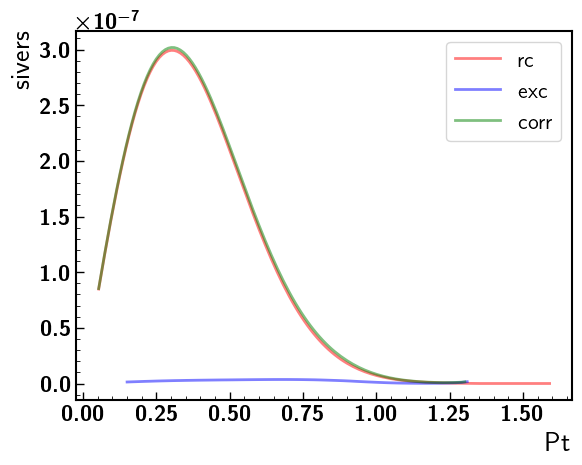

In [27]:
plt.plot(x_jlab2siv*0.375*np.sqrt(8),jlab2siv,'r',alpha=0.5,label='rc')
plt.plot(x_jlab2siv_exc*0.375*np.sqrt(8),jlab2siv_exc,'b',alpha=0.5,label='exc')
plt.plot(x_jlab2siv*0.375*np.sqrt(8),result,'g',alpha=0.5,label='corr')
plt.legend()
plt.xlabel('Pt')
plt.ylabel('sivers')

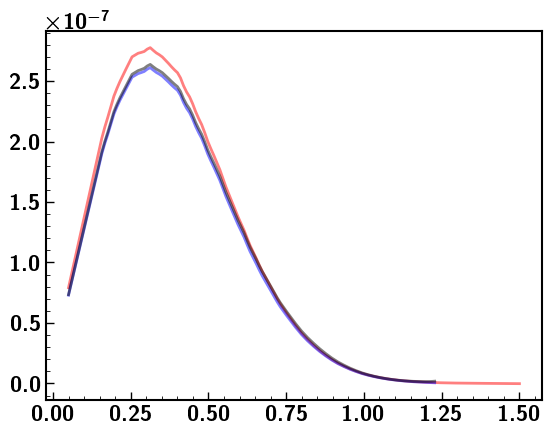

In [28]:
jlab2siv_fortran_bn = df_JLab2_sasha['sumsibs']/Factor/2
interpolator = interp1d(x_jlab2siv_exc, jlab2siv_fortran_bn, kind='linear', fill_value='extrapolate')
jlab2siv_fortran_bn_interpolated = interpolator(x_jlab2siv)
plt.plot(x_jlab2siv,jlab2siv_fortran_bn_interpolated,'r',alpha=0.5)

jlab2siv_fortran_rc_noexc = df_JLab2_sasha['sumsigsi']/Factor/2
interpolator = interp1d(x_jlab2siv_exc, jlab2siv_fortran_rc_noexc, kind='linear', fill_value='extrapolate')
jlab2siv_fortran_rc_noexc_interpolated = interpolator(x_jlab2siv)
plt.plot(x_jlab2siv,jlab2siv_fortran_rc_noexc_interpolated,'b',alpha=0.5)

jlab2siv_fortran_rc = df_JLab2_sasha['sumsigst']/Factor/2
interpolator = interp1d(x_jlab2siv_exc, jlab2siv_fortran_rc, kind='linear', fill_value='extrapolate')
jlab2siv_fortran_rc_interpolated = interpolator(x_jlab2siv)
plt.plot(x_jlab2siv,jlab2siv_fortran_rc_interpolated,'k',alpha=0.5)


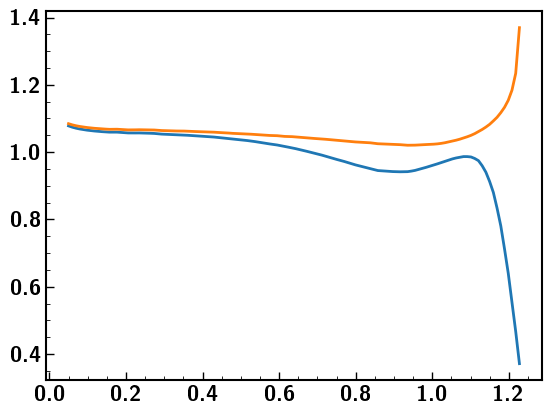

In [29]:
plt.plot(x_jlab2siv,jlab2siv_fortran_bn_interpolated/jlab2siv_fortran_rc_interpolated)
plt.plot(x_jlab2siv,jlab2siv_fortran_bn_interpolated/jlab2siv_fortran_rc_noexc_interpolated)



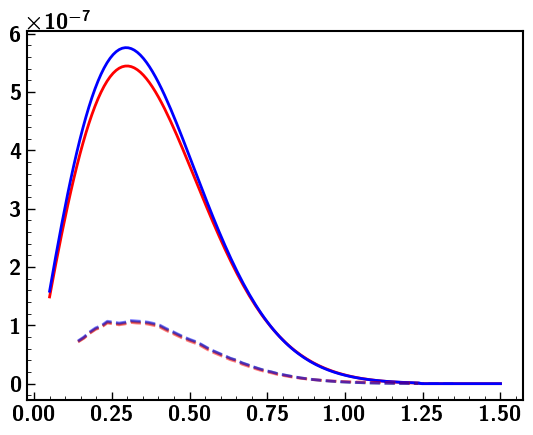

In [30]:
#check born
jlab2col_qt_to_q = df_T_jlab2_col['qt_to_Q'] 
jlab2col_rc = df_T_jlab2_col['collins_rc'] 
jlab2col_bn = df_T_jlab2_col['collins_bn']
plt.plot(jlab2col_qt_to_q,jlab2col_rc,'r',label='T col rc')
plt.plot(jlab2col_qt_to_q,jlab2col_bn,'b',label='T col bn')

#from fortran
jlab2col_fortran_qt_to_q = qt_to_q_jlab2#df_JLab2_sasha['pt2']
jlab2col_fortran_rc = df_JLab2_sasha['r6']*df_JLab2_sasha['sumsib']/Factor/2
jlab2col_fortran_rc_noexc = df_JLab2_sasha['r5']*df_JLab2_sasha['sumsib']/Factor/2
jlab2col_fortran_bn = df_JLab2_sasha['r4']*df_JLab2_sasha['sumsib']/Factor/2
plt.plot(jlab2col_fortran_qt_to_q,jlab2col_fortran_rc_noexc,'k',alpha=0.5,linestyle='--')
plt.plot(jlab2col_fortran_qt_to_q,jlab2col_fortran_rc,'r',alpha=0.5,linestyle='--')
plt.plot(jlab2col_fortran_qt_to_q,jlab2col_fortran_bn,'b',alpha=0.5,linestyle='--')
#df_JLab2_sasha['sumsigsi']

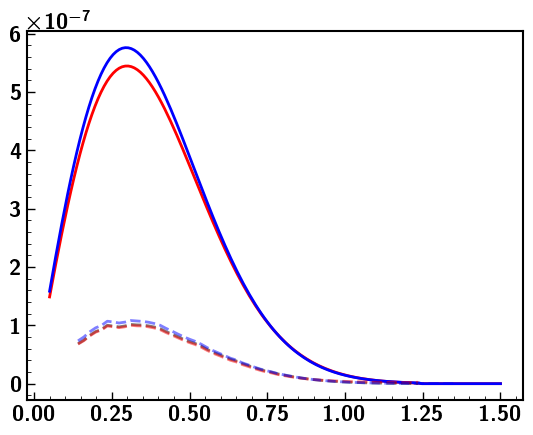

In [31]:
#check born
jlab2col_qt_to_q = df_T_jlab2_col['qt_to_Q'] 
jlab2col_rc = df_T_jlab2_col['collins_rc'] 
jlab2col_bn = df_T_jlab2_col['collins_bn']
plt.plot(jlab2col_qt_to_q,jlab2col_rc,'r',label='T col rc')
plt.plot(jlab2col_qt_to_q,jlab2col_bn,'b',label='T col bn')

#from fortran
jlab2col_fortran_qt_to_q = qt_to_q_jlab2#df_JLab2_sasha['pt2']
jlab2col_fortran_rc = df_JLab2_sasha['sumsigct']/Factor/2
jlab2col_fortran_rc_noexc = df_JLab2_sasha['sumsigci']/Factor/2
jlab2col_fortran_bn = df_JLab2_sasha['sumsibc']/Factor/2
plt.plot(jlab2col_fortran_qt_to_q,jlab2col_fortran_rc_noexc,'k',alpha=0.5,linestyle='--')
plt.plot(jlab2col_fortran_qt_to_q,jlab2col_fortran_rc,'r',alpha=0.5,linestyle='--')
plt.plot(jlab2col_fortran_qt_to_q,jlab2col_fortran_bn,'b',alpha=0.5,linestyle='--')
#df_JLab2_sasha['sumsigsi']

Text(1, 0, 'qt/Q')

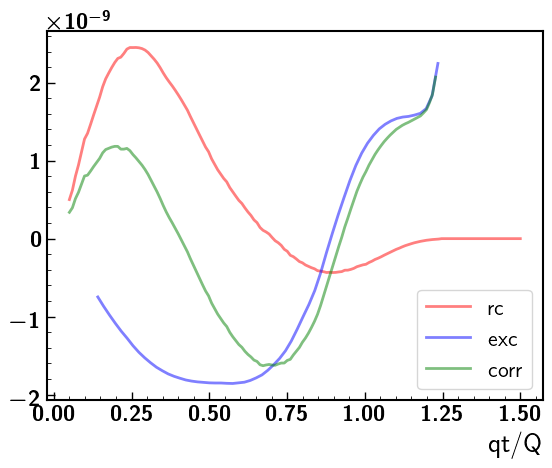

In [32]:
x_jlab2col = df_T_jlab2_col['qt_to_Q']   # Grid for A
jlab2col = df_T_jlab2_col['sivers_rc'] # Example values for A
#plt.plot(np.asarray(df_T_jlab2_siv['qt_to_Q']),df_T_jlab2_siv['sivers_rc'],color='b',label='Traditional rc')

x_jlab2col_exc = qt_to_q_jlab2 # Grid for B
jlab2col_exc =  exc_jlab2_col/Factor/2  # Example values for B

# Interpolate B onto the grid of A
interpolator = interp1d(x_jlab2col_exc, jlab2col_exc, kind='linear', fill_value='extrapolate')
jlab2col_exc_interpolated = interpolator(x_jlab2col)

# Subtract B from A
result = jlab2col + jlab2col_exc_interpolated

# Print or plot the result
#print("Result:", result)
plt.plot(x_jlab2col,jlab2col,'r',alpha=0.5,label='rc')
plt.plot(x_jlab2col_exc,jlab2col_exc,'b',alpha=0.5,label='exc')
plt.plot(x_jlab2col,result,'g',alpha=0.5,label='corr')
plt.legend()
plt.xlabel('qt/Q')

Text(0, 1, 'collins')

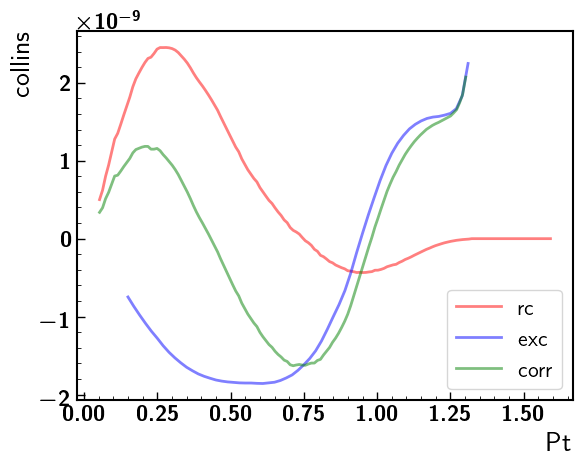

In [33]:
plt.plot(x_jlab2col*0.375*np.sqrt(8),jlab2col,'r',alpha=0.5,label='rc')
plt.plot(x_jlab2col_exc*0.375*np.sqrt(8),jlab2col_exc,'b',alpha=0.5,label='exc')
plt.plot(x_jlab2col*0.375*np.sqrt(8),result,'g',alpha=0.5,label='corr')
plt.legend()
plt.xlabel('Pt')
plt.ylabel('collins')

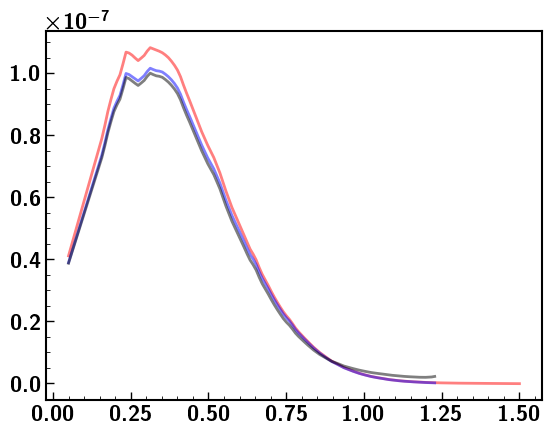

In [34]:
jlab2col_fortran_bn = df_JLab2_sasha['sumsibc']/Factor/2
interpolator = interp1d(x_jlab2col_exc, jlab2col_fortran_bn, kind='linear', fill_value='extrapolate')
jlab2col_fortran_bn_interpolated = interpolator(x_jlab2col)
plt.plot(x_jlab2col,jlab2col_fortran_bn_interpolated,'r',alpha=0.5)

jlab2col_fortran_rc_noexc = df_JLab2_sasha['sumsigci']/Factor/2
interpolator = interp1d(x_jlab2col_exc, jlab2col_fortran_rc_noexc, kind='linear', fill_value='extrapolate')
jlab2col_fortran_rc_noexc_interpolated = interpolator(x_jlab2col)
plt.plot(x_jlab2col,jlab2col_fortran_rc_noexc_interpolated,'b',alpha=0.5)

jlab2col_fortran_rc = df_JLab2_sasha['sumsigct']/Factor/2
interpolator = interp1d(x_jlab2col_exc, jlab2col_fortran_rc, kind='linear', fill_value='extrapolate')
jlab2col_fortran_rc_interpolated = interpolator(x_jlab2col)
plt.plot(x_jlab2col,jlab2col_fortran_rc_interpolated,'k',alpha=0.5)


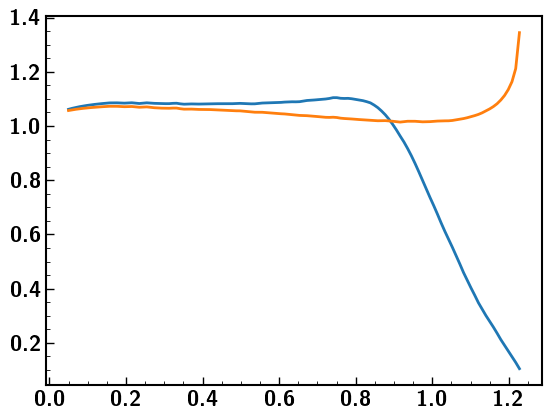

In [35]:
plt.plot(x_jlab2col,jlab2col_fortran_bn_interpolated/jlab2col_fortran_rc_interpolated)
plt.plot(x_jlab2col,jlab2col_fortran_bn_interpolated/jlab2col_fortran_rc_noexc_interpolated)



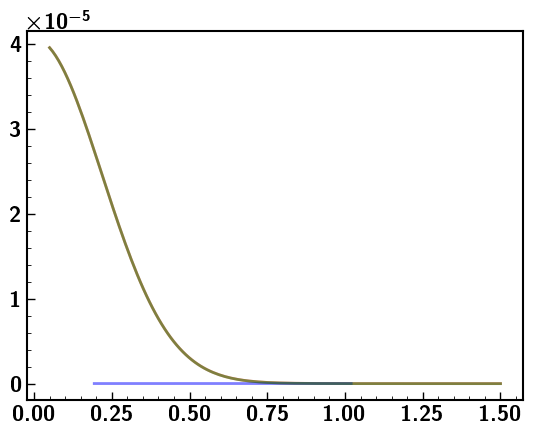

In [36]:

# Define your grids and values
x_jlab3 = df_T_jlab3_unpol['qt_to_Q']   # Grid for A
jlab3 = df_T_jlab3_unpol['unpol_rc'] # Example values for A

x_jlab3_exc = qt_to_q_jlab3 # Grid for B
jlab3_exc =  exc_jlab3/Factor  # Example values for B


# Interpolate B onto the grid of A
interpolator = interp1d(x_jlab3_exc, jlab3_exc, kind='linear', fill_value='extrapolate')
jlab3_exc_interpolated = interpolator(x_jlab3)

# Subtract B from A
result = jlab3 - jlab3_exc_interpolated

# Print or plot the result
#print("Result:", result)
plt.plot(x_jlab3,jlab3,'r',alpha=0.5,label='rc')
plt.plot(x_jlab3_exc,jlab3_exc,'b',alpha=0.5,label='exc')
plt.plot(x_jlab3,result,'g',alpha=0.5,label='corr')

Text(1, 0, 'Pt')

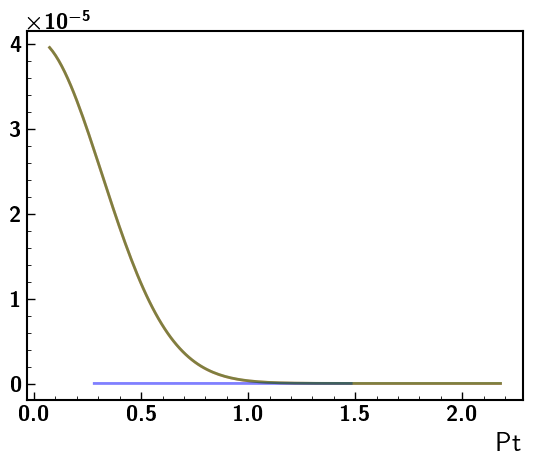

In [37]:

# Define your grids and values
x_jlab3 = df_T_jlab3_unpol['qt_to_Q']   # Grid for A
jlab3 = df_T_jlab3_unpol['unpol_rc'] # Example values for A

x_jlab3_exc = qt_to_q_jlab3 # Grid for B
jlab3_exc =  exc_jlab3/Factor  # Example values for B


# Interpolate B onto the grid of A
interpolator = interp1d(x_jlab3_exc, jlab3_exc, kind='linear', fill_value='extrapolate')
jlab3_exc_interpolated = interpolator(x_jlab3)

# Subtract B from A
result = jlab3 + jlab3_exc_interpolated

# Print or plot the result
#print("Result:", result)
plt.plot(x_jlab3*0.375*np.sqrt(15),jlab3,'r',alpha=0.5,label='rc')
plt.plot(x_jlab3_exc*0.375*np.sqrt(15),jlab3_exc,'b',alpha=0.5,label='exc')
plt.plot(x_jlab3*0.375*np.sqrt(15),result,'g',alpha=0.5,label='corr')
plt.xlabel('Pt')

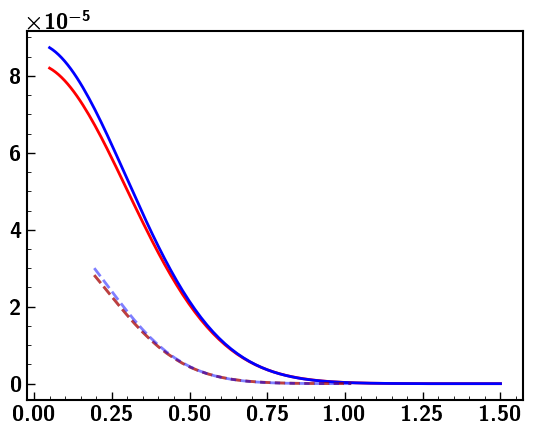

In [38]:
#check born
jlab3_qt_to_q = df_T_jlab2_unpol['qt_to_Q'] 
jlab3_rc = df_T_jlab2_unpol['unpol_rc'] 
jlab3_bn = df_T_jlab2_unpol['unpol_bn']
plt.plot(jlab3_qt_to_q,jlab2_rc,'r',label='T rc')
plt.plot(jlab3_qt_to_q,jlab2_bn,'b',label='T bn')

#from fortran
jlab3_fortran_qt_to_q = qt_to_q_jlab3#df_JLab3_sasha['pt2']
jlab3_fortran_rc = df_JLab3_sasha['sumsigt']/Factor
jlab3_fortran_rc_noexc = df_JLab3_sasha['sumsigi']/Factor
jlab3_fortran_bn = df_JLab3_sasha['sumsib']/Factor
plt.plot(jlab3_fortran_qt_to_q,jlab3_fortran_rc_noexc,'k',alpha=0.5,linestyle='--')
plt.plot(jlab3_fortran_qt_to_q,jlab3_fortran_rc,'r',alpha=0.5,linestyle='--')
plt.plot(jlab3_fortran_qt_to_q,jlab3_fortran_bn,'b',alpha=0.5,linestyle='--')
#df_JLab2_sasha['sumsigsi']

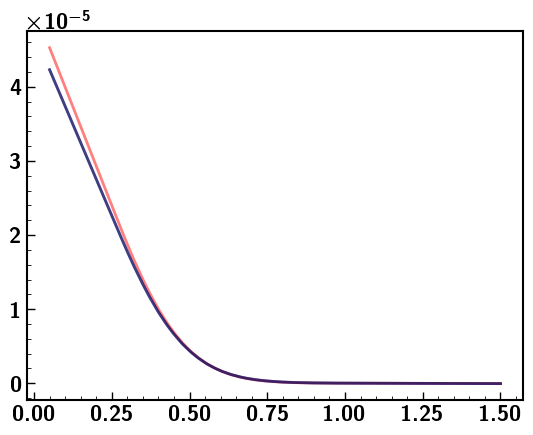

In [39]:
jlab3_fortran_bn = df_JLab3_sasha['sumsib']/Factor
interpolator = interp1d(x_jlab3_exc, jlab3_fortran_bn, kind='linear', fill_value='extrapolate')
jlab3_fortran_bn_interpolated = interpolator(x_jlab3)
plt.plot(x_jlab3,jlab3_fortran_bn_interpolated,'r',alpha=0.5)

jlab3_fortran_rc_noexc = df_JLab3_sasha['sumsigi']/Factor
interpolator = interp1d(x_jlab3_exc, jlab3_fortran_rc_noexc, kind='linear', fill_value='extrapolate')
jlab3_fortran_rc_noexc_interpolated = interpolator(x_jlab3)
plt.plot(x_jlab3,jlab3_fortran_rc_noexc_interpolated,'b',alpha=0.5)

jlab3_fortran_rc = df_JLab3_sasha['sumsigt']/Factor
interpolator = interp1d(x_jlab3_exc, jlab3_fortran_rc, kind='linear', fill_value='extrapolate')
jlab3_fortran_rc_interpolated = interpolator(x_jlab3)
plt.plot(x_jlab3,jlab3_fortran_rc_interpolated,'k',alpha=0.5)


(0.0, 2.0)

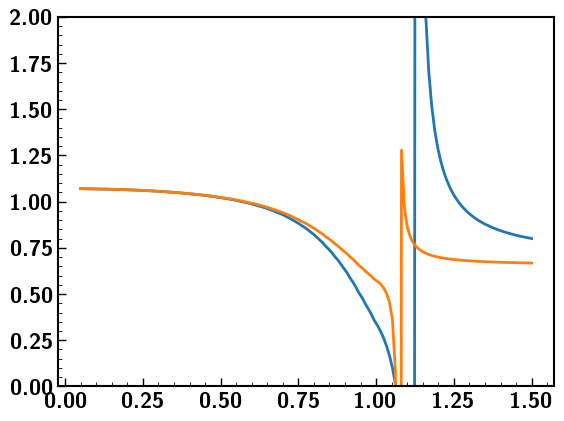

In [40]:
plt.plot(x_jlab3,jlab3_fortran_bn_interpolated/jlab3_fortran_rc_interpolated)
plt.plot(x_jlab3,jlab3_fortran_bn_interpolated/jlab3_fortran_rc_noexc_interpolated)
plt.ylim(0,2)


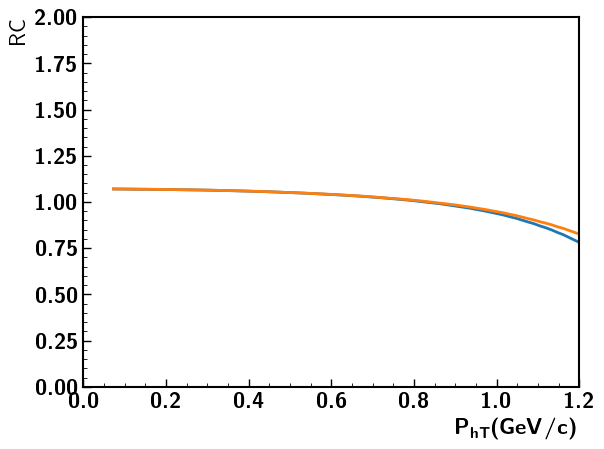

In [41]:
plt.plot(x_jlab3*0.375*np.sqrt(15),jlab3_fortran_bn_interpolated/jlab3_fortran_rc_interpolated)
plt.plot(x_jlab3*0.375*np.sqrt(15),jlab3_fortran_bn_interpolated/jlab3_fortran_rc_noexc_interpolated)

plt.ylim(0,2)
plt.xlim(0,1.2)
plt.ylabel('RC',fontsize=16)
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.savefig('results/compare/Fine/fortran_exc_rc_jlab3_Pt.pdf')


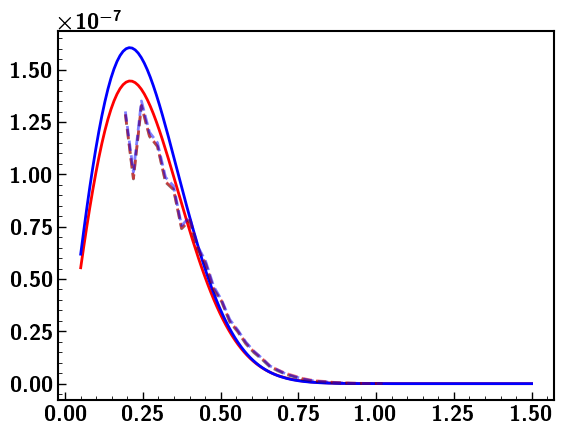

In [42]:
#check born
jlab3siv_qt_to_q = df_T_jlab3_siv['qt_to_Q'] 
jlab3siv_rc = df_T_jlab3_siv['sivers_rc'] 
jlab3siv_bn = df_T_jlab3_siv['sivers_bn']
plt.plot(jlab3siv_qt_to_q,jlab3siv_rc,'r',label='T siv rc')
plt.plot(jlab3siv_qt_to_q,jlab3siv_bn,'b',label='T siv bn')

#from fortran
jlab3siv_fortran_qt_to_q = qt_to_q_jlab3#df_JLab2_sasha['pt2']
jlab3siv_fortran_rc = df_JLab3_sasha['r3']*df_JLab3_sasha['sumsib']/Factor/2
jlab3siv_fortran_rc_noexc = df_JLab3_sasha['r2']*df_JLab3_sasha['sumsib']/Factor/2
jlab3siv_fortran_bn = df_JLab3_sasha['r1']*df_JLab3_sasha['sumsib']/Factor/2
plt.plot(jlab3siv_fortran_qt_to_q,jlab3siv_fortran_rc_noexc,'k',alpha=0.5,linestyle='--')
plt.plot(jlab3siv_fortran_qt_to_q,jlab3siv_fortran_rc,'r',alpha=0.5,linestyle='--')
plt.plot(jlab3siv_fortran_qt_to_q,jlab3siv_fortran_bn,'b',alpha=0.5,linestyle='--')
#df_JLab2_sasha['sumsigsi']

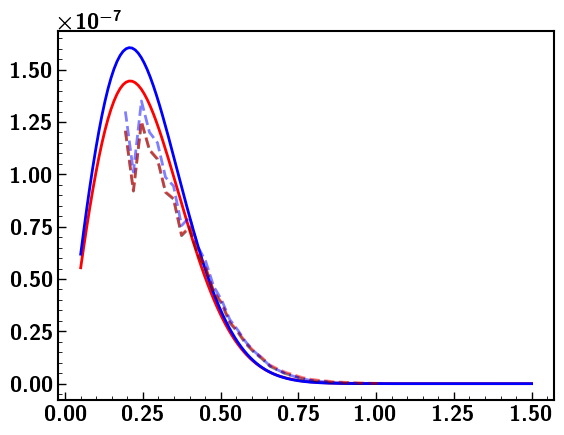

In [43]:
#check born
jlab3siv_qt_to_q = df_T_jlab3_siv['qt_to_Q'] 
jlab3siv_rc = df_T_jlab3_siv['sivers_rc'] 
jlab3siv_bn = df_T_jlab3_siv['sivers_bn']
plt.plot(jlab3siv_qt_to_q,jlab3siv_rc,'r',label='T siv rc')
plt.plot(jlab3siv_qt_to_q,jlab3siv_bn,'b',label='T siv bn')

#from fortran
jlab3siv_fortran_qt_to_q = qt_to_q_jlab3#df_JLab2_sasha['pt2']
jlab3siv_fortran_rc = df_JLab3_sasha['sumsigst']/Factor/2
jlab3siv_fortran_rc_noexc = df_JLab3_sasha['sumsigsi']/Factor/2
jlab3siv_fortran_bn = df_JLab3_sasha['sumsibs']/Factor/2
plt.plot(jlab3siv_fortran_qt_to_q,jlab3siv_fortran_rc_noexc,'k',alpha=0.5,linestyle='--')
plt.plot(jlab3siv_fortran_qt_to_q,jlab3siv_fortran_rc,'r',alpha=0.5,linestyle='--')
plt.plot(jlab3siv_fortran_qt_to_q,jlab3siv_fortran_bn,'b',alpha=0.5,linestyle='--')
#df_JLab2_sasha['sumsigsi']

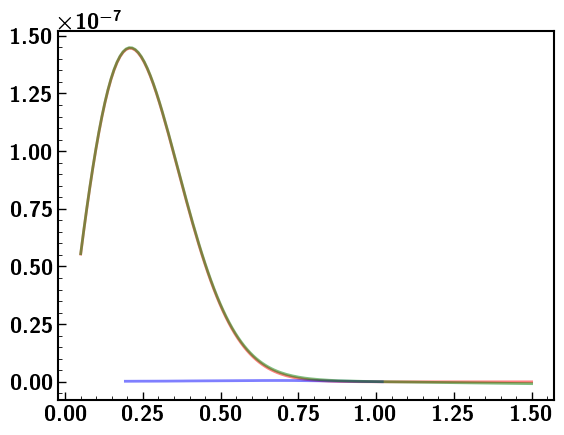

In [44]:
x_jlab3siv = df_T_jlab3_siv['qt_to_Q']   # Grid for A
jlab3siv = df_T_jlab3_siv['sivers_rc'] # Example values for A
#plt.plot(np.asarray(df_T_jlab2_siv['qt_to_Q']),df_T_jlab2_siv['sivers_rc'],color='b',label='Traditional rc')

x_jlab3siv_exc = qt_to_q_jlab3 # Grid for B
jlab3siv_exc =  exc_jlab3_siv/Factor/2  # Example values for B

# Interpolate B onto the grid of A
interpolator = interp1d(x_jlab3siv_exc, jlab3siv_exc, kind='linear', fill_value='extrapolate')
jlab3siv_exc_interpolated = interpolator(x_jlab3siv)

# Subtract B from A
result = jlab3siv + jlab3siv_exc_interpolated

# Print or plot the result
#print("Result:", result)
plt.plot(x_jlab3siv,jlab3siv,'r',alpha=0.5,label='rc')
plt.plot(x_jlab3siv_exc,jlab3siv_exc,'b',alpha=0.5,label='exc')
plt.plot(x_jlab3siv,result,'g',alpha=0.5,label='corr')

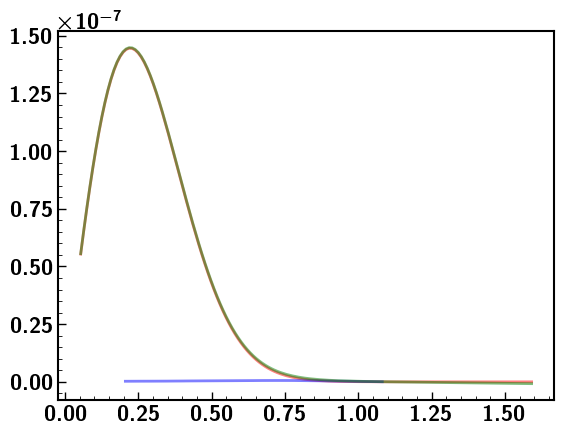

In [45]:
plt.plot(x_jlab3siv*0.375*np.sqrt(8),jlab3siv,'r',alpha=0.5,label='rc')
plt.plot(x_jlab3siv_exc*0.375*np.sqrt(8),jlab3siv_exc,'b',alpha=0.5,label='exc')
plt.plot(x_jlab3siv*0.375*np.sqrt(8),result,'g',alpha=0.5,label='corr')

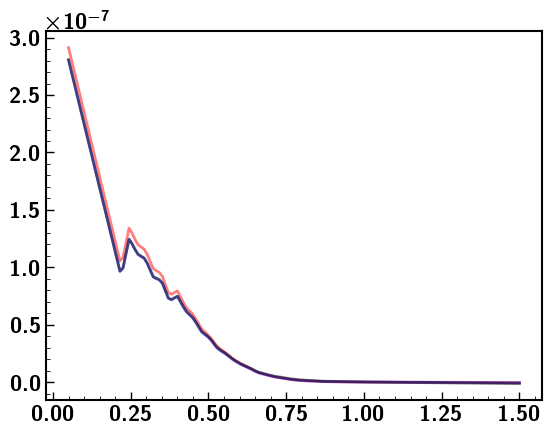

In [46]:
jlab3siv_fortran_bn = df_JLab3_sasha['sumsibs']/Factor/2
interpolator = interp1d(x_jlab3siv_exc, jlab3siv_fortran_bn, kind='linear', fill_value='extrapolate')
jlab3siv_fortran_bn_interpolated = interpolator(x_jlab3siv)
plt.plot(x_jlab3siv,jlab3siv_fortran_bn_interpolated,'r',alpha=0.5)

jlab3siv_fortran_rc_noexc = df_JLab3_sasha['sumsigsi']/Factor/2
interpolator = interp1d(x_jlab3siv_exc, jlab3siv_fortran_rc_noexc, kind='linear', fill_value='extrapolate')
jlab3siv_fortran_rc_noexc_interpolated = interpolator(x_jlab3siv)
plt.plot(x_jlab3siv,jlab3siv_fortran_rc_noexc_interpolated,'b',alpha=0.5)

jlab3siv_fortran_rc = df_JLab3_sasha['sumsigst']/Factor/2
interpolator = interp1d(x_jlab3siv_exc, jlab3siv_fortran_rc, kind='linear', fill_value='extrapolate')
jlab3siv_fortran_rc_interpolated = interpolator(x_jlab3siv)
plt.plot(x_jlab3siv,jlab3siv_fortran_rc_interpolated,'k',alpha=0.5)


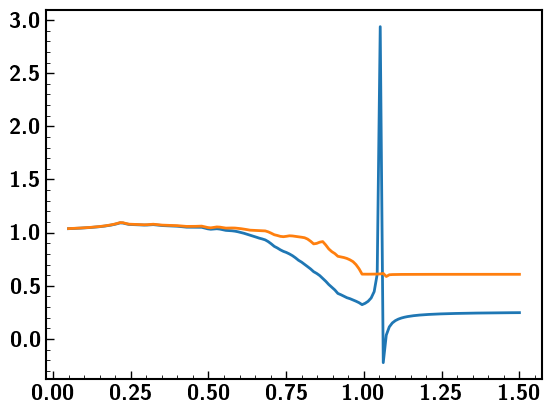

In [47]:
plt.plot(x_jlab3siv,jlab3siv_fortran_bn_interpolated/jlab3siv_fortran_rc_interpolated)
plt.plot(x_jlab3siv,jlab3siv_fortran_bn_interpolated/jlab3siv_fortran_rc_noexc_interpolated)



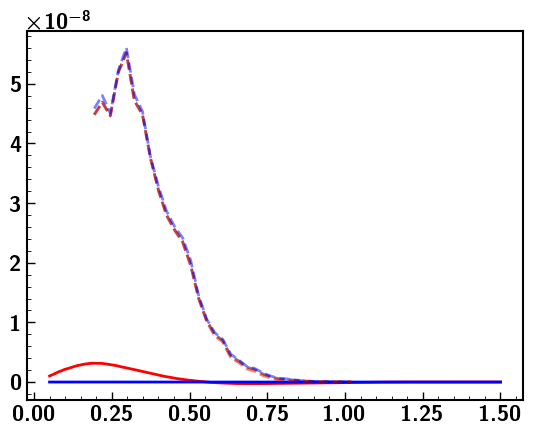

In [48]:
#check born
jlab3col_qt_to_q = df_T_jlab3_col['qt_to_Q'] 
jlab3col_rc = df_T_jlab3_col['sivers_rc'] 
jlab3col_bn = df_T_jlab3_col['sivers_bn']
plt.plot(jlab3col_qt_to_q,jlab3col_rc,'r',label='T col rc')
plt.plot(jlab3col_qt_to_q,jlab3col_bn,'b',label='T col bn')

#from fortran
jlab3col_fortran_qt_to_q = qt_to_q_jlab3#df_JLab2_sasha['pt2']
jlab3col_fortran_rc = df_JLab3_sasha['r6']*df_JLab3_sasha['sumsib']/Factor/2
jlab3col_fortran_rc_noexc = df_JLab3_sasha['r5']*df_JLab3_sasha['sumsib']/Factor/2
jlab3col_fortran_bn = df_JLab3_sasha['r4']*df_JLab3_sasha['sumsib']/Factor/2
plt.plot(jlab3col_fortran_qt_to_q,jlab3col_fortran_rc_noexc,'k',alpha=0.5,linestyle='--')
plt.plot(jlab3col_fortran_qt_to_q,jlab3col_fortran_rc,'r',alpha=0.5,linestyle='--')
plt.plot(jlab3col_fortran_qt_to_q,jlab3col_fortran_bn,'b',alpha=0.5,linestyle='--')
#df_JLab2_sasha['sumsigsi']

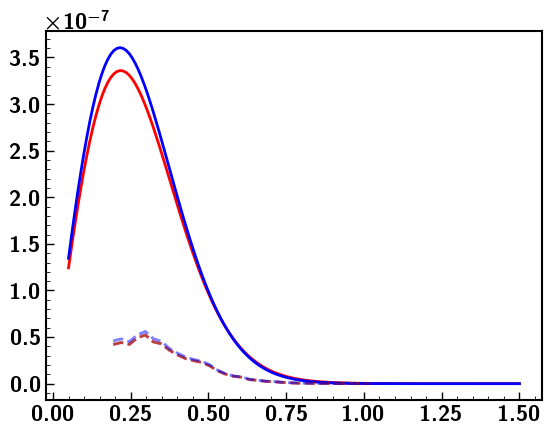

In [49]:
#check born
jlab3col_qt_to_q = df_T_jlab3_col['qt_to_Q'] 
jlab3col_rc = df_T_jlab3_col['collins_rc'] 
jlab3col_bn = df_T_jlab3_col['collins_bn']
plt.plot(jlab3col_qt_to_q,jlab3col_rc,'r',label='T col rc')
plt.plot(jlab3col_qt_to_q,jlab3col_bn,'b',label='T col bn')

#from fortran
jlab3col_fortran_qt_to_q = qt_to_q_jlab3#df_JLab2_sasha['pt2']
jlab3col_fortran_rc = df_JLab3_sasha['sumsigct']/Factor/2
jlab3col_fortran_rc_noexc = df_JLab3_sasha['sumsigci']/Factor/2
jlab3col_fortran_bn = df_JLab3_sasha['sumsibc']/Factor/2
plt.plot(jlab3col_fortran_qt_to_q,jlab3col_fortran_rc_noexc,'k',alpha=0.5,linestyle='--')
plt.plot(jlab3col_fortran_qt_to_q,jlab3col_fortran_rc,'r',alpha=0.5,linestyle='--')
plt.plot(jlab3col_fortran_qt_to_q,jlab3col_fortran_bn,'b',alpha=0.5,linestyle='--')
#df_JLab2_sasha['sumsigsi']

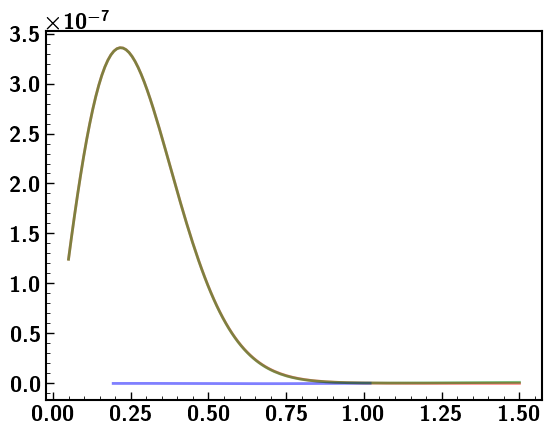

In [50]:
x_jlab3col = df_T_jlab3_col['qt_to_Q']   # Grid for A
jlab3col = df_T_jlab3_col['collins_rc'] # Example values for A
#plt.plot(np.asarray(df_T_jlab2_siv['qt_to_Q']),df_T_jlab2_siv['sivers_rc'],color='b',label='Traditional rc')

x_jlab3col_exc = qt_to_q_jlab3 # Grid for B
jlab3col_exc =  exc_jlab3_col/Factor/2  # Example values for B

# Interpolate B onto the grid of A
interpolator = interp1d(x_jlab3col_exc, jlab3col_exc, kind='linear', fill_value='extrapolate')
jlab3col_exc_interpolated = interpolator(x_jlab3col)

# Subtract B from A
result = jlab3col + jlab3col_exc_interpolated

# Print or plot the result
#print("Result:", result)
plt.plot(x_jlab3col,jlab3col,'r',alpha=0.5,label='rc')
plt.plot(x_jlab3col_exc,jlab3col_exc,'b',alpha=0.5,label='exc')
plt.plot(x_jlab3col,result,'g',alpha=0.5,label='corr')

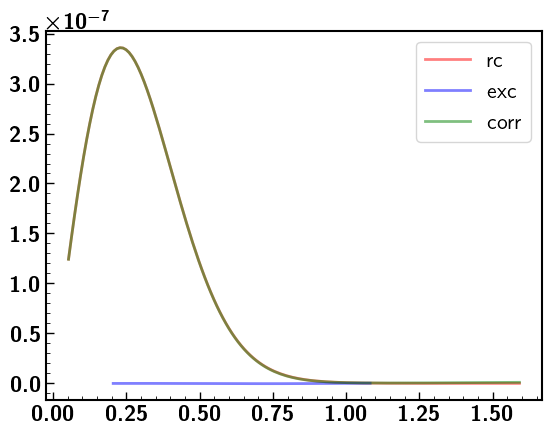

In [51]:
plt.plot(x_jlab3col*0.375*np.sqrt(8),jlab3col,'r',alpha=0.5,label='rc')
plt.plot(x_jlab3col_exc*0.375*np.sqrt(8),jlab3col_exc,'b',alpha=0.5,label='exc')
plt.plot(x_jlab3col*0.375*np.sqrt(8),result,'g',alpha=0.5,label='corr')
plt.legend()

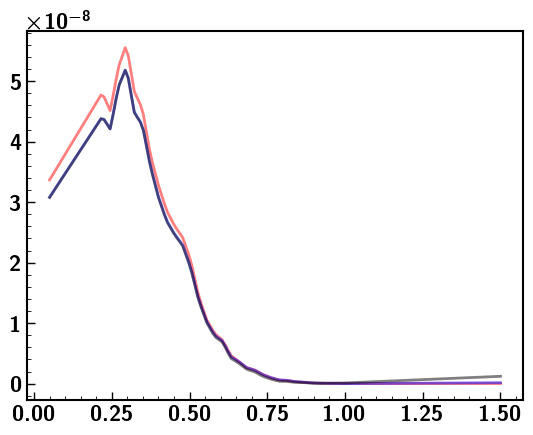

In [52]:
jlab3col_fortran_bn = df_JLab3_sasha['sumsibc']/Factor/2
interpolator = interp1d(x_jlab3col_exc, jlab3col_fortran_bn, kind='linear', fill_value='extrapolate')
jlab3col_fortran_bn_interpolated = interpolator(x_jlab3col)
plt.plot(x_jlab3col,jlab3col_fortran_bn_interpolated,'r',alpha=0.5)

jlab3col_fortran_rc_noexc = df_JLab3_sasha['sumsigci']/Factor/2
interpolator = interp1d(x_jlab3col_exc, jlab3col_fortran_rc_noexc, kind='linear', fill_value='extrapolate')
jlab3col_fortran_rc_noexc_interpolated = interpolator(x_jlab3col)
plt.plot(x_jlab3col,jlab3col_fortran_rc_noexc_interpolated,'b',alpha=0.5)

jlab3col_fortran_rc = df_JLab3_sasha['sumsigct']/Factor/2
interpolator = interp1d(x_jlab3col_exc, jlab3col_fortran_rc, kind='linear', fill_value='extrapolate')
jlab3col_fortran_rc_interpolated = interpolator(x_jlab3col)
plt.plot(x_jlab3col,jlab3col_fortran_rc_interpolated,'k',alpha=0.5)


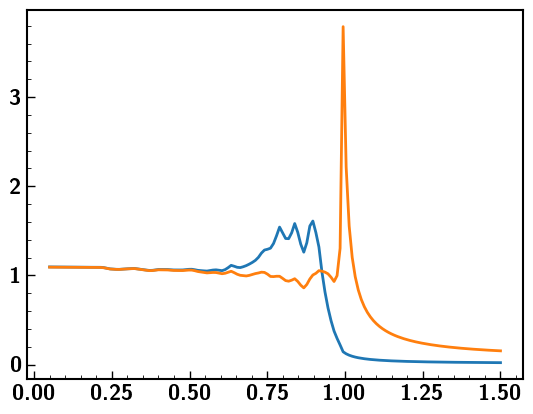

In [53]:
plt.plot(x_jlab3col,jlab3col_fortran_bn_interpolated/jlab3col_fortran_rc_interpolated)
plt.plot(x_jlab3col,jlab3col_fortran_bn_interpolated/jlab3col_fortran_rc_noexc_interpolated)



In [54]:
#df_T_JLab1_unpol = pd.read_csv('results/Tra-results/results-fine/results/JLab1-unpol.txt',delim_whitespace=True)
#df_T_JLab1_unpol.head()
#df_T_JLab1_siv = pd.read_csv('results/Tra-results/results-fine/results/JLab1-siv.txt',delim_whitespace=True)
#df_T_JLab1_siv.head()
#df_T_JLab1_col = pd.read_csv('results/Tra-results/results-fine/results/JLab1-col.txt',delim_whitespace=True)
#df_T_JLab1_col.head()

In [55]:
column_names=['x','z','Q','qT_Q','xs','xs_err']
df_F_JLab_1_siv_rc = pd.read_csv('results/Fac-results/Fine/Jlab_1_siv_rc.txt',delim_whitespace=True,names=column_names)
df_F_JLab_1_siv_bn = pd.read_csv('results/Fac-results/Fine/Jlab_1_siv_born.txt',delim_whitespace=True,names=column_names)
df_F_JLab_1_col_rc = pd.read_csv('results/Fac-results/Fine/Jlab_1_col_rc.txt',delim_whitespace=True,names=column_names)
df_F_JLab_1_col_bn = pd.read_csv('results/Fac-results/Fine/Jlab_1_col_born.txt',delim_whitespace=True,names=column_names)
df_F_JLab_1_unpol_rc = pd.read_csv('results/Fac-results/Fine/Jlab_1_unpol_rc.txt',delim_whitespace=True,names=column_names)
df_F_JLab_1_unpol_bn = pd.read_csv('results/Fac-results/Fine/Jlab_1_unpol_born.txt',delim_whitespace=True,names=column_names)
df_F_JLab_1_siv_rc.head()

,x,z,Q,qT_Q,xs,xs_err
0,0.32,0.55,1.52,0.050000,6.908459e-07,6.631026e-10
1,0.32,0.55,1.52,0.059732,8.223901e-07,1.533767e-09
2,0.32,0.55,1.52,0.069463,9.546781e-07,1.913452e-09
3,0.32,0.55,1.52,0.079195,1.084987e-06,1.830628e-09
4,0.32,0.55,1.52,0.088926,1.212386e-06,1.318942e-09


In [56]:
df_F_JLab_2_siv_rc = pd.read_csv('results/Fac-results/Fine/JLab_2_siv_rc.txt',delim_whitespace=True,names=column_names)
df_F_JLab_2_siv_bn = pd.read_csv('results/Fac-results/Fine/JLab_2_siv_born.txt',delim_whitespace=True,names=column_names)
df_F_JLab_2_col_rc = pd.read_csv('results/Fac-results/Fine/JLab_2_col_rc.txt',delim_whitespace=True,names=column_names)
df_F_JLab_2_col_bn = pd.read_csv('results/Fac-results/Fine/JLab_2_col_born.txt',delim_whitespace=True,names=column_names)
df_F_JLab_2_unpol_rc = pd.read_csv('results/Fac-results/Fine/JLab_2_unpol_rc.txt',delim_whitespace=True,names=column_names)
df_F_JLab_2_unpol_bn = pd.read_csv('results/Fac-results/Fine/JLab_2_unpol_born.txt',delim_whitespace=True,names=column_names)
df_F_JLab_2_siv_rc.head()

,x,z,Q,qT_Q,xs,xs_err
0,0.48,0.375,2.828427,0.050000,7.792513e-08,1.114061e-10
1,0.48,0.375,2.828427,0.059732,9.229497e-08,1.315476e-10
2,0.48,0.375,2.828427,0.069463,1.064115e-07,1.547483e-10
3,0.48,0.375,2.828427,0.079195,1.200563e-07,2.028765e-10
4,0.48,0.375,2.828427,0.088926,1.342281e-07,1.764218e-10


In [57]:
#df_F_JLab2_siv_rc = pd.read_csv('results/Fac-results/JLab_2_siv_rc.txt',delim_whitespace=True,skiprows=12)
#df_F_JLab2_siv_bn = pd.read_csv('results/Fac-results/JLab_2_siv_bn.txt',delim_whitespace=True,skiprows=12)
#df_F_JLab2_col_rc = pd.read_csv('results/Fac-results/JLab_2_col_rc.txt',delim_whitespace=True,skiprows=12)
#df_F_JLab2_col_bn = pd.read_csv('results/Fac-results/JLab_2_col_bn.txt',delim_whitespace=True,skiprows=12)
#df_F_JLab2_unpol_rc = pd.read_csv('results/Fac-results/JLab_2_unpol_rc.txt',delim_whitespace=True,skiprows=12)
#df_F_JLab2_unpol_bn = pd.read_csv('results/Fac-results/JLab_2_unpol_bn.txt',delim_whitespace=True,skiprows=12)
#df_F_JLab2_siv_rc.head()
#df_T_JLab2 = pd.read_csv('results/Tra-results/inj-all/results-jlab2.txt',delim_whitespace=True)
#df_T_JLab2.head()

In [58]:
df_F_JLab_3_siv_rc = pd.read_csv('results/Fac-results/Fine/JLab_3_siv_rc.txt',delim_whitespace=True,names=column_names)
df_F_JLab_3_siv_bn = pd.read_csv('results/Fac-results/Fine/JLab_3_siv_born.txt',delim_whitespace=True,names=column_names)
df_F_JLab_3_col_rc = pd.read_csv('results/Fac-results/Fine/JLab_3_col_rc.txt',delim_whitespace=True,names=column_names)
df_F_JLab_3_col_bn = pd.read_csv('results/Fac-results/Fine/JLab_3_col_born.txt',delim_whitespace=True,names=column_names)
df_F_JLab_3_unpol_rc = pd.read_csv('results/Fac-results/Fine/JLab_3_unpol_rc.txt',delim_whitespace=True,names=column_names)
df_F_JLab_3_unpol_bn = pd.read_csv('results/Fac-results/Fine/JLab_3_unpol_born.txt',delim_whitespace=True,names=column_names)
df_F_JLab_3_siv_rc.head()

,x,z,Q,qT_Q,xs,xs_err
0,0.48,0.375,3.872983,0.050000,5.029640e-08,5.158228e-11
1,0.48,0.375,3.872983,0.059732,5.944289e-08,9.676507e-11
2,0.48,0.375,3.872983,0.069463,6.791768e-08,7.584533e-11
3,0.48,0.375,3.872983,0.079195,7.658041e-08,1.282779e-10
4,0.48,0.375,3.872983,0.088926,8.412522e-08,2.281262e-10


In [59]:
#df_F_JLab3_siv_rc = pd.read_csv('results/Fac-results/JLab_3_siv_rc.txt',delim_whitespace=True,skiprows=12)
#df_F_JLab3_siv_bn = pd.read_csv('results/Fac-results/JLab_3_siv_bn.txt',delim_whitespace=True,skiprows=12)
#df_F_JLab3_col_rc = pd.read_csv('results/Fac-results/JLab_3_col_rc.txt',delim_whitespace=True,skiprows=12)
#df_F_JLab3_col_bn = pd.read_csv('results/Fac-results/JLab_3_col_bn.txt',delim_whitespace=True,skiprows=12)
#df_F_JLab3_unpol_rc = pd.read_csv('results/Fac-results/JLab_3_unpol_rc.txt',delim_whitespace=True,skiprows=12)
#df_F_JLab3_unpol_bn = pd.read_csv('results/Fac-results/JLab_3_unpol_bn.txt',delim_whitespace=True,skiprows=12)
#df_F_JLab3_siv_rc.head()
#df_T_JLab3 = pd.read_csv('results/Tra-results/inj-all/results-jlab3.txt',delim_whitespace=True)
#df_T_JLab3.head()

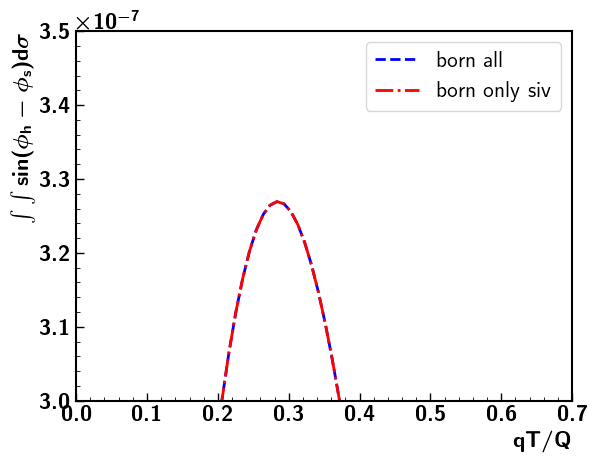

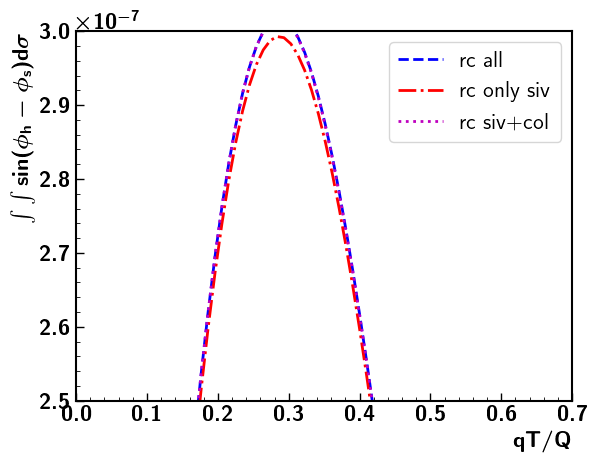

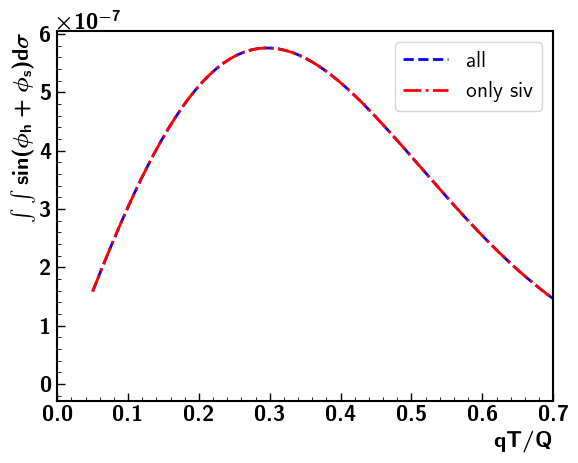

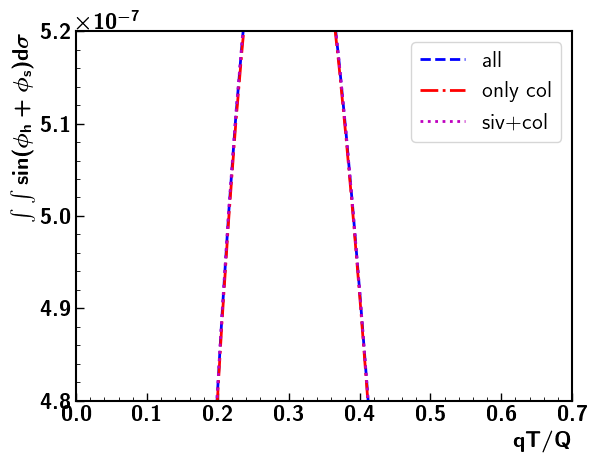

In [60]:
#df_T_eic3_unpol,df_T_jlab2_unpol(all included),df_T_eic3_siv(only siv, the rc case would be different)
#df_F_JLab_2_unpol_bn
#fig,ax=one_plot()
plt.plot(np.asarray(df_T_jlab2_unpol['qt_to_Q']),df_T_jlab2_unpol['sivers_bn'],color='b',linestyle='--',label='born all')
plt.plot(np.asarray(df_T_jlab2_siv['qt_to_Q']),df_T_jlab2_siv['sivers_bn'],color='r',linestyle='-.',label='born only siv')
plt.xlim(0,0.7)
plt.ylim(3e-7,3.5e-7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h-\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/Tra_siv_bn_JLab2.pdf')
plt.figure()
plt.plot(np.asarray(df_T_jlab2_unpol['qt_to_Q']),df_T_jlab2_unpol['sivers_rc'],color='b',linestyle='--',label='rc all')
plt.plot(np.asarray(df_T_jlab2_siv['qt_to_Q']),df_T_jlab2_siv['sivers_rc'],color='r',linestyle='-.',label='rc only siv')
plt.plot(np.asarray(df_T_jlab2_siv['qt_to_Q']),np.asarray(df_T_jlab2_siv['sivers_rc'])+np.asarray(df_T_jlab2_col['sivers_rc']),color='m',linestyle=':',label='rc siv+col')
plt.xlim(0,0.7)
plt.ylim(2.5e-7,3e-7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h-\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/Tra_siv_rc_JLab2.pdf')
plt.figure()
plt.plot(np.asarray(df_T_jlab2_unpol['qt_to_Q']),df_T_jlab2_unpol['collins_bn'],color='b',linestyle='--',label='all')
plt.plot(np.asarray(df_T_jlab2_col['qt_to_Q']),df_T_jlab2_col['collins_bn'],color='r',linestyle='-.',label='only siv')
plt.xlim(0,0.7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h+\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/Tra_col_bn_JLab2.pdf')
plt.figure()
plt.plot(np.asarray(df_T_jlab2_unpol['qt_to_Q']),df_T_jlab2_unpol['collins_rc'],color='b',linestyle='--',label='all')
plt.plot(np.asarray(df_T_jlab2_col['qt_to_Q']),df_T_jlab2_col['collins_rc'],color='r',linestyle='-.',label='only col')
plt.plot(np.asarray(df_T_jlab2_col['qt_to_Q']),np.asarray(df_T_jlab2_col['collins_rc'])+np.asarray(df_T_jlab2_siv['collins_rc']),color='m',linestyle=':',label='siv+col')
plt.xlim(0,0.7)
plt.ylim(4.8e-7,5.2e-7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h+\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/Tra_col_rc_JLab2.pdf')

In [61]:
exc_column_names= ['q2','x','z','pt2','sumsibs/sumsib','sumsigsi/sumsigi','sumsigst/sumsigt','sumsibc/sumsib','sumsigci/sumsigi','sumsigct/sumsigt','sumsib','sumsigi','sumsigt','sumsibs','sumsigsi','sumsigst','sumsibc','sumsigci','sumsigct']

df_T_jlab2_exc = pd.read_csv('results/Tra-results/Exc/JLab2',delim_whitespace=True,names=exc_column_names)
df_T_jlab2_exc.head()

,q2,x,z,pt2,sumsibs/sumsib,sumsigsi/sumsigi,sumsigst/sumsigt,sumsibc/sumsib,sumsigci/sumsigi,sumsigct/sumsigt,sumsib,sumsigi,sumsigt,sumsibs,sumsigsi,sumsigst,sumsibc,sumsigci,sumsigct
0,8.0,0.48,0.375,0.0225,0.004492,0.004435,0.004467,0.001785,0.001758,0.001738,201.18,190.68,190.77,0.90376,0.84560,0.85223,0.35906,0.33518,0.33152
1,8.0,0.48,0.375,0.0289,0.005161,0.005098,0.005136,0.002000,0.001966,0.001943,195.77,185.64,185.73,1.01030,0.94637,0.95392,0.39163,0.36506,0.36081
2,8.0,0.48,0.375,0.0361,0.005732,0.005657,0.005701,0.002290,0.002251,0.002223,189.87,180.12,180.21,1.08840,1.01900,1.02740,0.43477,0.40541,0.40061
3,8.0,0.48,0.375,0.0441,0.006382,0.006308,0.006357,0.002551,0.002510,0.002478,183.52,174.17,174.27,1.17120,1.09860,1.10790,0.46813,0.43716,0.43184
4,8.0,0.48,0.375,0.0529,0.006933,0.006849,0.006905,0.002761,0.002713,0.002677,176.78,167.86,167.96,1.22560,1.14970,1.15970,0.48813,0.45542,0.44961


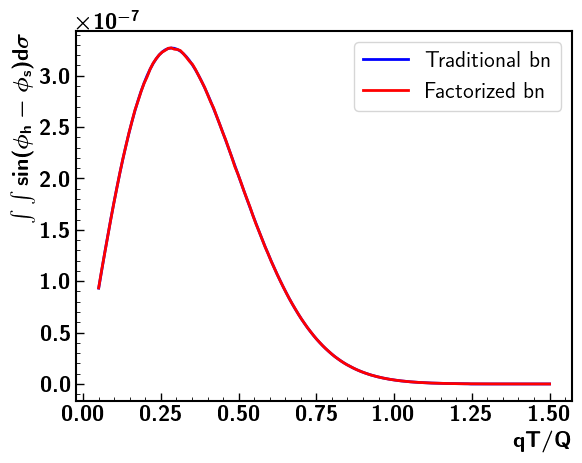

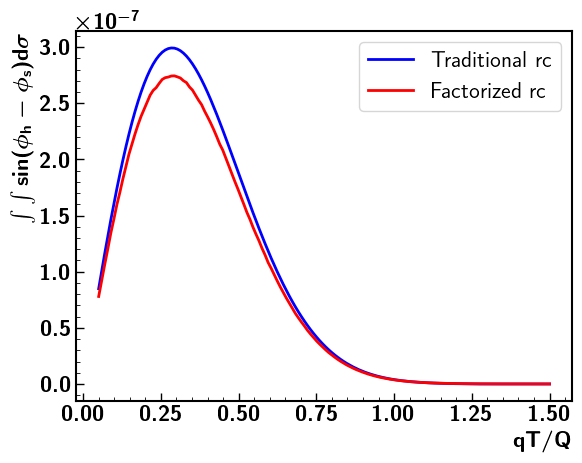

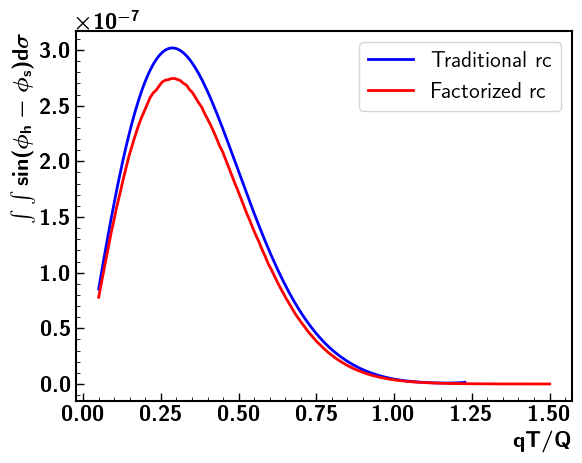

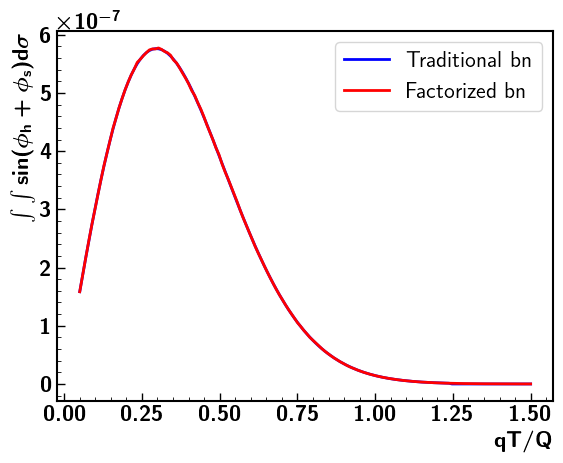

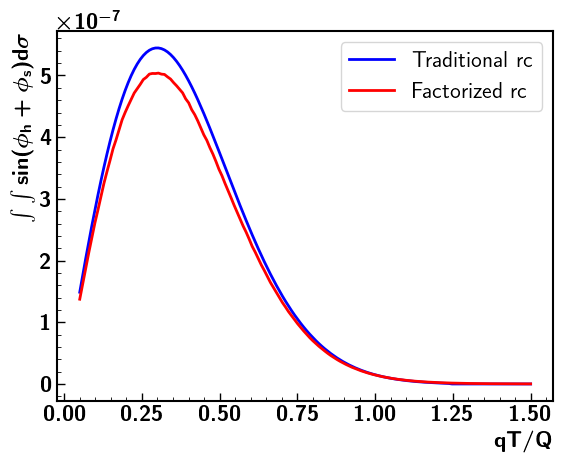

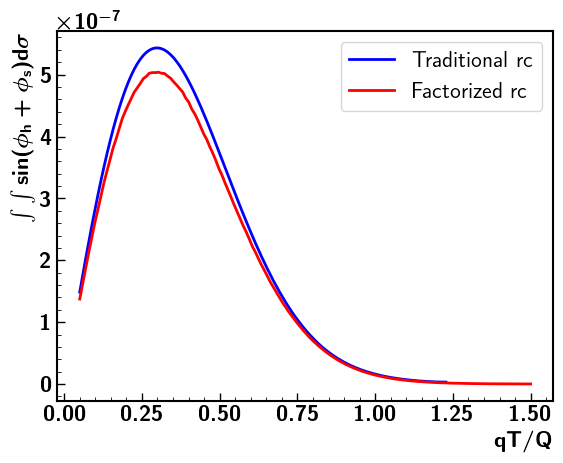

In [62]:
#plt.plot(np.asarray(df_T_JLab2['qt_to_Q']),df_T_JLab2['sivers_bn'],color='b',label='Tra bn rough')
#plt.plot(np.asarray(df_F_JLab2_siv_bn['qT_Q']),df_F_JLab2_siv_bn['xs'],color='r',label='Fac bn rough')

plt.plot(np.asarray(df_T_jlab2_siv['qt_to_Q']),df_T_jlab2_siv['sivers_bn'],color='b',label='Traditional bn')
plt.plot(np.asarray(df_F_JLab_2_siv_bn['qT_Q']),df_F_JLab_2_siv_bn['xs'],color='r',label='Factorized bn')
#plt.xlim(0,0.7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h-\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justsiv_bn_jlab2.pdf')

plt.figure()
#plt.plot(np.asarray(df_T_JLab2['qt_to_Q']),df_T_JLab2['sivers_rc'],color='b',label='Tra rc rough')
#plt.plot(np.asarray(df_F_JLab2_siv_rc['qT_Q']),df_F_JLab2_siv_rc['xs'],color='r',label='Fac rc rough')

plt.plot(np.asarray(df_T_jlab2_siv['qt_to_Q']),df_T_jlab2_siv['sivers_rc'],color='b',label='Traditional rc')
plt.plot(np.asarray(df_F_JLab_2_siv_rc['qT_Q']),df_F_JLab_2_siv_rc['xs'],color='r',label='Factorized rc')
#plt.xlim(0,0.7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h-\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justsiv_rc_jlab2.pdf')

plt.figure()
#plt.plot(np.asarray(df_T_JLab2['qt_to_Q']),df_T_JLab2['sivers_rc'],color='b',label='Tra rc rough')
#plt.plot(np.asarray(df_F_JLab2_siv_rc['qT_Q']),df_F_JLab2_siv_rc['xs'],color='r',label='Fac rc rough')

plt.plot(np.asarray(df_T_jlab2_siv['qt_to_Q']),df_T_jlab2_siv['sivers_rc']+jlab2siv_exc_interpolated,color='b',label='Traditional rc')
plt.plot(np.asarray(df_F_JLab_2_siv_rc['qT_Q']),df_F_JLab_2_siv_rc['xs'],color='r',label='Factorized rc')
#plt.xlim(0,0.7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h-\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justsiv_excrc_jlab2.pdf')


plt.figure()
#plt.plot(np.asarray(df_T_JLab2['qt_to_Q']),df_T_JLab2['collins_bn'],color='b',label='Tra bn rough')
#plt.plot(np.asarray(df_F_JLab2_col_bn['qT_Q']),df_F_JLab2_col_bn['xs'],color='r',label='Fac bn rough')

plt.plot(np.asarray(df_T_jlab2_col['qt_to_Q']),df_T_jlab2_col['collins_bn'],color='b',label='Traditional bn')
plt.plot(np.asarray(df_F_JLab_2_col_bn['qT_Q']),df_F_JLab_2_col_bn['xs'],color='r',label='Factorized bn')
#plt.xlim(0,0.7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h+\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justcol_bn_jlab2.pdf')

plt.figure()
#plt.plot(np.asarray(df_T_JLab2['qt_to_Q']),df_T_JLab2['collins_rc'],color='b',label='Tra rc rough')
#plt.plot(np.asarray(df_F_JLab2_col_rc['qT_Q']),df_F_JLab2_col_rc['xs'],color='r',label='Fac rc rough')

plt.plot(np.asarray(df_T_jlab2_col['qt_to_Q']),df_T_jlab2_col['collins_rc'],color='b',label='Traditional rc')
plt.plot(np.asarray(df_F_JLab_2_col_rc['qT_Q']),df_F_JLab_2_col_rc['xs'],color='r',label='Factorized rc')
#plt.xlim(0,0.7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h+\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justcol_rc_jlab2.pdf')

plt.figure()
#plt.plot(np.asarray(df_T_JLab2['qt_to_Q']),df_T_JLab2['collins_rc'],color='b',label='Tra rc rough')
#plt.plot(np.asarray(df_F_JLab2_col_rc['qT_Q']),df_F_JLab2_col_rc['xs'],color='r',label='Fac rc rough')

plt.plot(np.asarray(df_T_jlab2_col['qt_to_Q']),df_T_jlab2_col['collins_rc']+jlab2col_exc_interpolated,color='b',label='Traditional rc')
plt.plot(np.asarray(df_F_JLab_2_col_rc['qT_Q']),df_F_JLab_2_col_rc['xs'],color='r',label='Factorized rc')
#plt.xlim(0,0.7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h+\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justcol_excrc_jlab2.pdf')

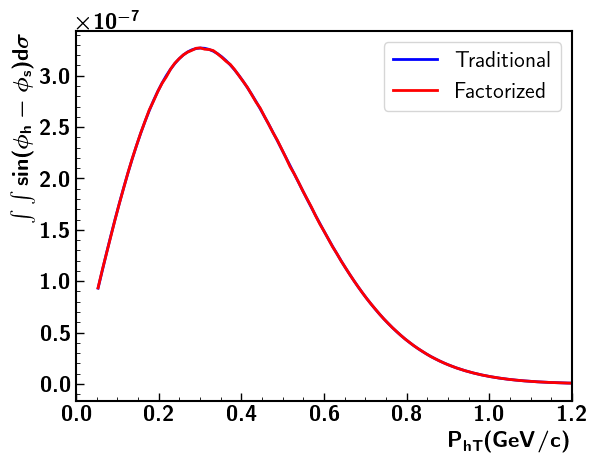

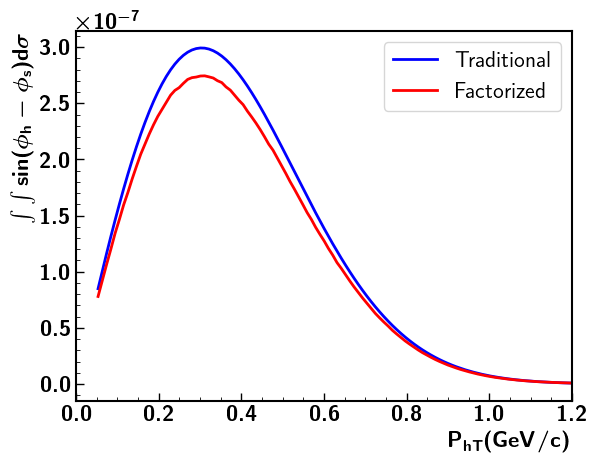

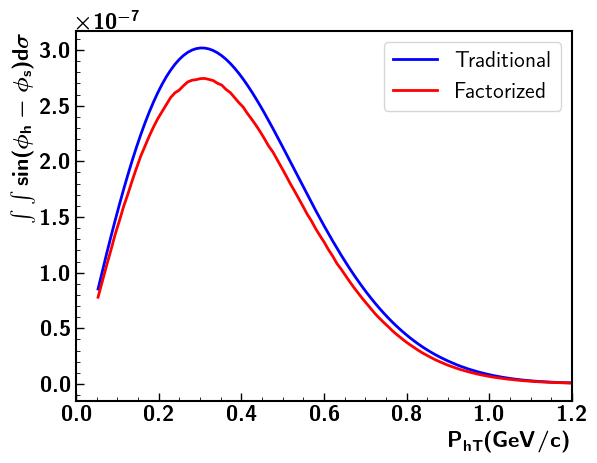

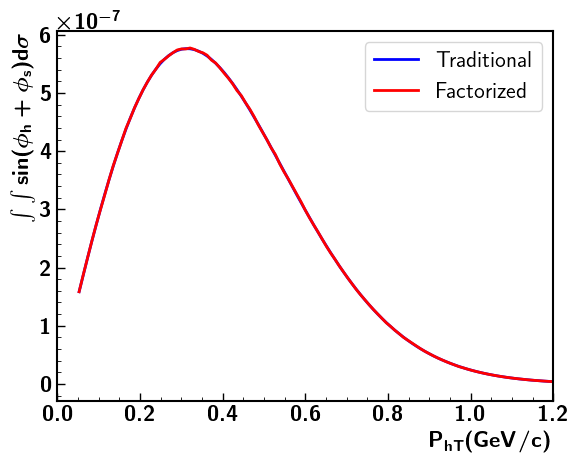

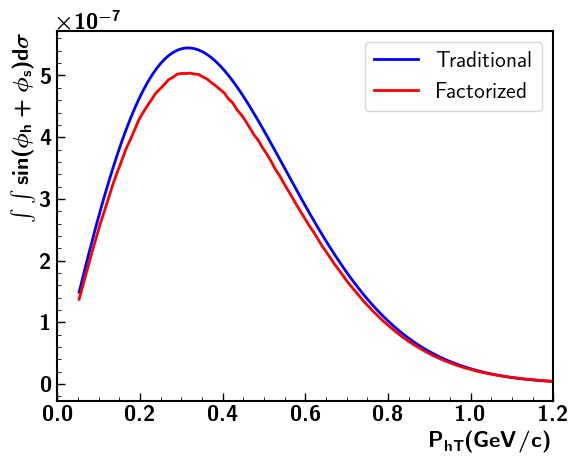

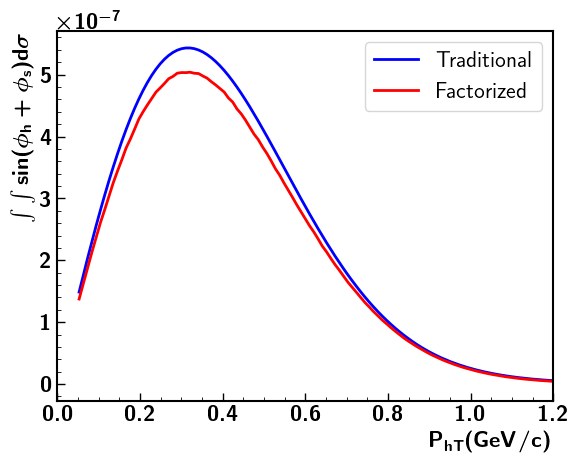

In [63]:
#plt.plot(np.asarray(df_T_JLab2['qt_to_Q']),df_T_JLab2['sivers_bn'],color='b',label='Tra bn rough')
#plt.plot(np.asarray(df_F_JLab2_siv_bn['qT_Q']),df_F_JLab2_siv_bn['xs'],color='r',label='Fac bn rough')

plt.plot(np.asarray(df_T_jlab2_siv['qt_to_Q'])*0.375*np.sqrt(8),df_T_jlab2_siv['sivers_bn'],color='b',label='Traditional')
plt.plot(np.asarray(df_F_JLab_2_siv_bn['qT_Q'])*0.375*np.sqrt(8),df_F_JLab_2_siv_bn['xs'],color='r',label='Factorized')
plt.xlim(0,1.2)
plt.legend()
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h-\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justsiv_bn_jlab2_Pt.pdf')

plt.figure()
#plt.plot(np.asarray(df_T_JLab2['qt_to_Q']),df_T_JLab2['sivers_rc'],color='b',label='Tra rc rough')
#plt.plot(np.asarray(df_F_JLab2_siv_rc['qT_Q']),df_F_JLab2_siv_rc['xs'],color='r',label='Fac rc rough')

plt.plot(np.asarray(df_T_jlab2_siv['qt_to_Q'])*0.375*np.sqrt(8),df_T_jlab2_siv['sivers_rc'],color='b',label='Traditional')
plt.plot(np.asarray(df_F_JLab_2_siv_rc['qT_Q'])*0.375*np.sqrt(8),df_F_JLab_2_siv_rc['xs'],color='r',label='Factorized')
plt.xlim(0,1.2)
plt.legend()
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h-\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justsiv_rc_jlab2_Pt.pdf')

plt.figure()
#plt.plot(np.asarray(df_T_JLab2['qt_to_Q']),df_T_JLab2['sivers_rc'],color='b',label='Tra rc rough')
#plt.plot(np.asarray(df_F_JLab2_siv_rc['qT_Q']),df_F_JLab2_siv_rc['xs'],color='r',label='Fac rc rough')

plt.plot(np.asarray(df_T_jlab2_siv['qt_to_Q'])*0.375*np.sqrt(8),df_T_jlab2_siv['sivers_rc']+jlab2siv_exc_interpolated,color='b',label='Traditional')
plt.plot(np.asarray(df_F_JLab_2_siv_rc['qT_Q'])*0.375*np.sqrt(8),df_F_JLab_2_siv_rc['xs'],color='r',label='Factorized')
plt.xlim(0,1.2)
plt.legend()
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h-\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justsiv_excrc_jlab2_Pt.pdf')


plt.figure()
#plt.plot(np.asarray(df_T_JLab2['qt_to_Q']),df_T_JLab2['collins_bn'],color='b',label='Tra bn rough')
#plt.plot(np.asarray(df_F_JLab2_col_bn['qT_Q']),df_F_JLab2_col_bn['xs'],color='r',label='Fac bn rough')

plt.plot(np.asarray(df_T_jlab2_col['qt_to_Q'])*0.375*np.sqrt(8),df_T_jlab2_col['collins_bn'],color='b',label='Traditional')
plt.plot(np.asarray(df_F_JLab_2_col_bn['qT_Q'])*0.375*np.sqrt(8),df_F_JLab_2_col_bn['xs'],color='r',label='Factorized')
plt.xlim(0,1.2)
plt.legend()
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h+\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justcol_bn_jlab2_Pt.pdf')

plt.figure()
#plt.plot(np.asarray(df_T_JLab2['qt_to_Q']),df_T_JLab2['collins_rc'],color='b',label='Tra rc rough')
#plt.plot(np.asarray(df_F_JLab2_col_rc['qT_Q']),df_F_JLab2_col_rc['xs'],color='r',label='Fac rc rough')

plt.plot(np.asarray(df_T_jlab2_col['qt_to_Q'])*0.375*np.sqrt(8),df_T_jlab2_col['collins_rc'],color='b',label='Traditional')
plt.plot(np.asarray(df_F_JLab_2_col_rc['qT_Q'])*0.375*np.sqrt(8),df_F_JLab_2_col_rc['xs'],color='r',label='Factorized')
plt.xlim(0,1.2)
plt.legend()
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h+\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justcol_rc_jlab2_Pt.pdf')

plt.figure()
#plt.plot(np.asarray(df_T_JLab2['qt_to_Q']),df_T_JLab2['collins_rc'],color='b',label='Tra rc rough')
#plt.plot(np.asarray(df_F_JLab2_col_rc['qT_Q']),df_F_JLab2_col_rc['xs'],color='r',label='Fac rc rough')

plt.plot(np.asarray(df_T_jlab2_col['qt_to_Q'])*0.375*np.sqrt(8),df_T_jlab2_col['collins_rc']+jlab2col_exc_interpolated,color='b',label='Traditional')
plt.plot(np.asarray(df_F_JLab_2_col_rc['qT_Q'])*0.375*np.sqrt(8),df_F_JLab_2_col_rc['xs'],color='r',label='Factorized')
plt.xlim(0,1.2)
plt.legend()
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h+\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justcol_excrc_jlab2_Pt.pdf')

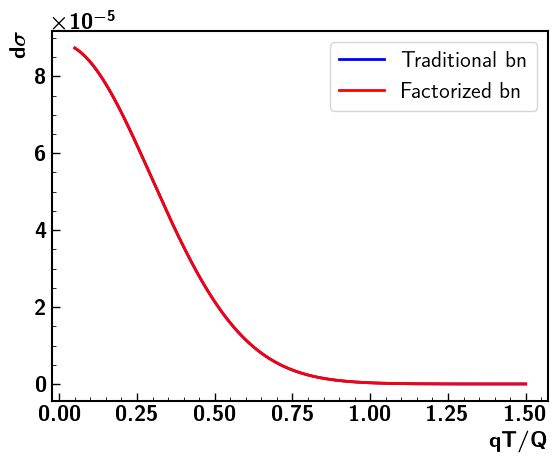

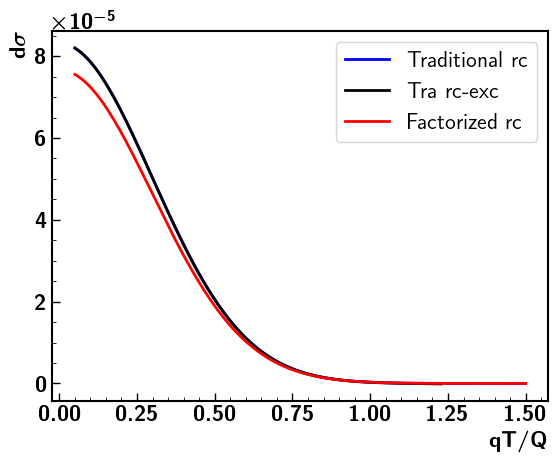

In [64]:

#plt.plot(np.asarray(df_T_JLab2['qt_to_Q']),df_T_JLab2['unpol_bn'],color='b',label='Tra bn rough')
#plt.plot(np.asarray(df_F_JLab2_unpol_bn['qT_Q']),df_F_JLab2_unpol_bn['xs'],color='r',label='Fac bn rough')

plt.plot(np.asarray(df_T_jlab2_unpol['qt_to_Q']),df_T_jlab2_unpol['unpol_bn'],color='b',label='Traditional bn')
plt.plot(np.asarray(df_F_JLab_2_unpol_bn['qT_Q']),df_F_JLab_2_unpol_bn['xs'],color='r',label='Factorized bn')
#plt.xlim(0,0.7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/unpol_bn_JLab2.pdf')

plt.figure()
#plt.plot(np.asarray(df_T_JLab2['qt_to_Q']),df_T_JLab2['unpol_rc'],color='b',label='Tra rc rough')
#plt.plot(np.asarray(df_F_JLab2_unpol_rc['qT_Q']),df_F_JLab2_unpol_rc['xs'],color='r',label='Fac rc rough')

plt.plot(np.asarray(df_T_jlab2_unpol['qt_to_Q']),df_T_jlab2_unpol['unpol_rc'],color='b',label='Traditional rc')
plt.plot(np.asarray(df_T_jlab2_unpol['qt_to_Q']),df_T_jlab2_unpol['unpol_rc']-jlab2_exc_interpolated,color='k',label='Tra rc-exc')
plt.plot(np.asarray(df_F_JLab_2_unpol_rc['qT_Q']),df_F_JLab_2_unpol_rc['xs'],color='r',label='Factorized rc')
#plt.xlim(0,0.7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/unpol_rc_JLab2.pdf')

/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_42131/646222319.py:4: RuntimeWarning: divide by zero encountered in divide
  R_Born_unpol_JLab2 = F_Born_JLab2/T_Born_JLab2
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_42131/646222319.py:17: RuntimeWarning: invalid value encountered in divide
  RC_T = (T_Born_JLab2/T_RC_JLab2)
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_42131/646222319.py:64: RuntimeWarning: invalid value encountered in divide
  RC_T_noexc = (T_Born_JLab2/T_RC_JLab2)
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_42131/2725842912.py:13: RuntimeWarning: invalid value encountered in double_scalars
  ratio = value1[i]/value2[i]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_42131/2725842912.py:14: RuntimeWarning: invalid value encountered in double_scalars
  ratio_err = ratio*math.sqrt((error1[i]/value1[i])**2+(error2[i]/value2[i])**2)
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_42131/646222319.p

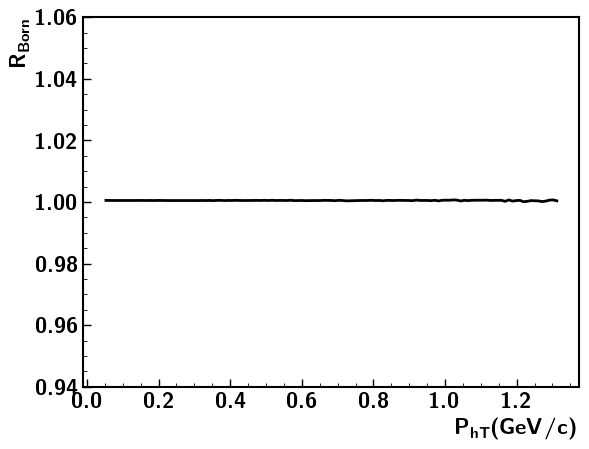

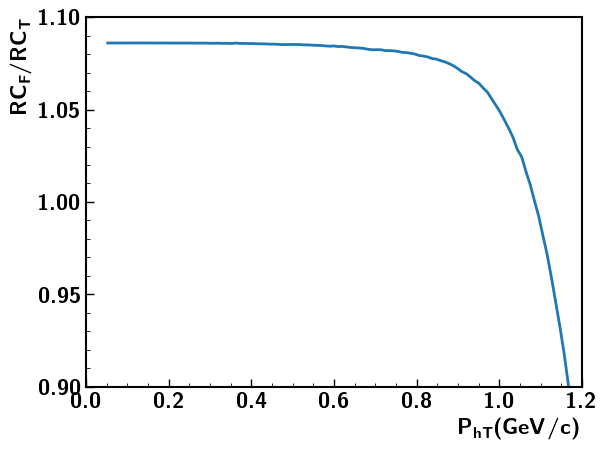

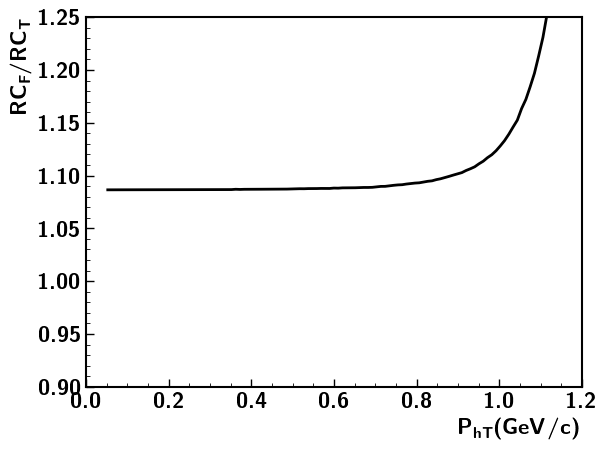

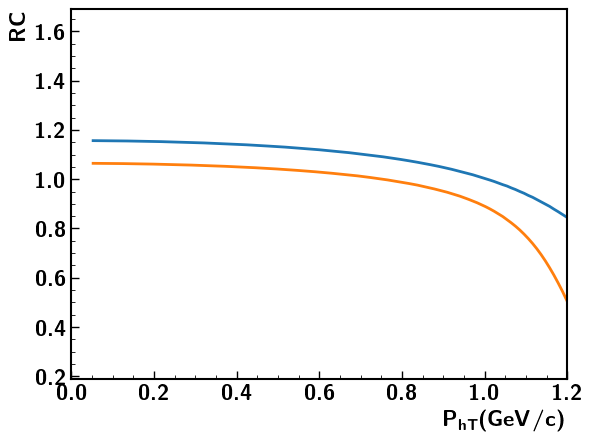

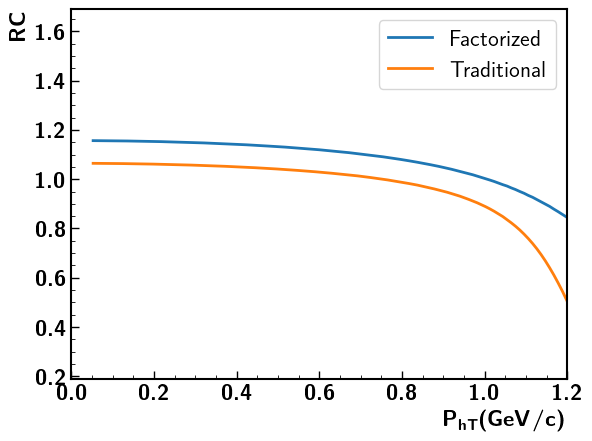

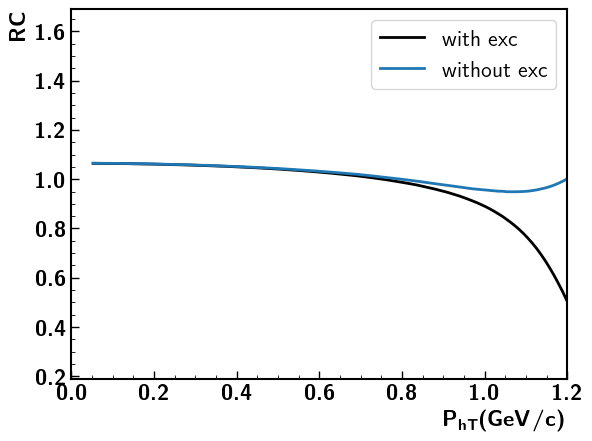

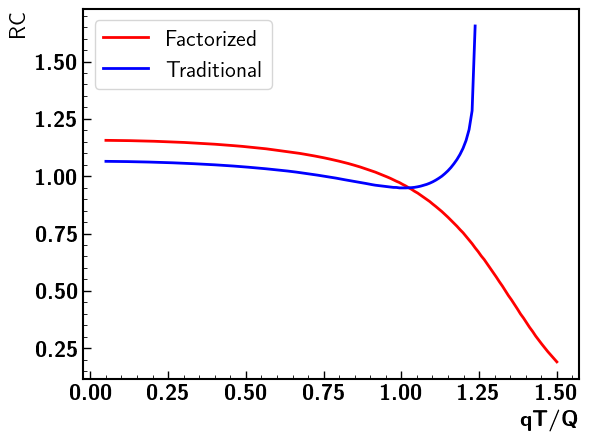

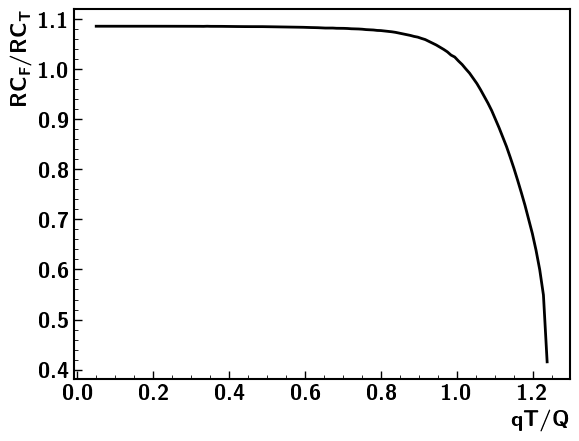

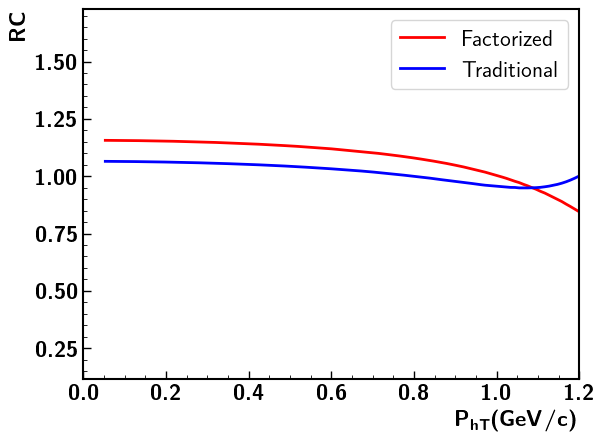

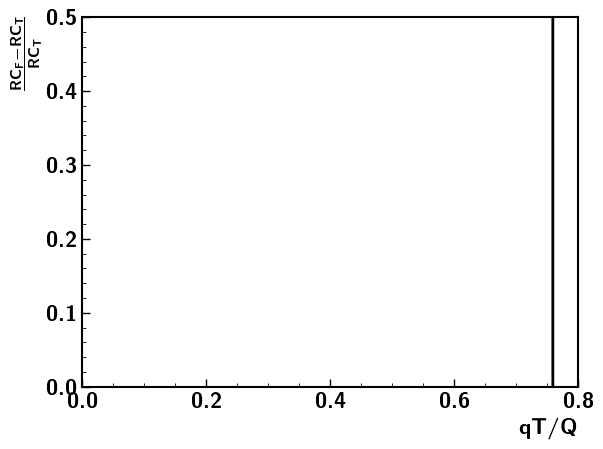

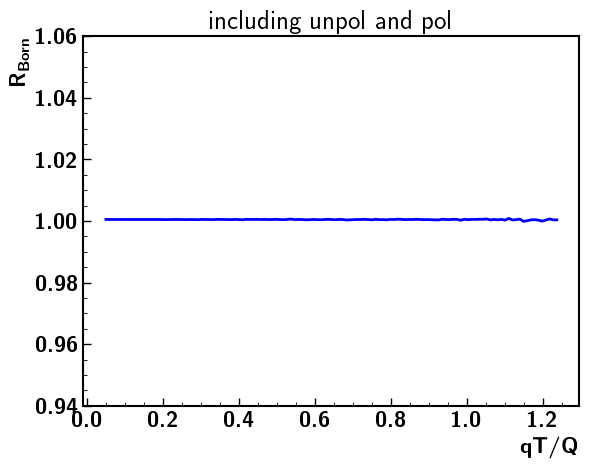

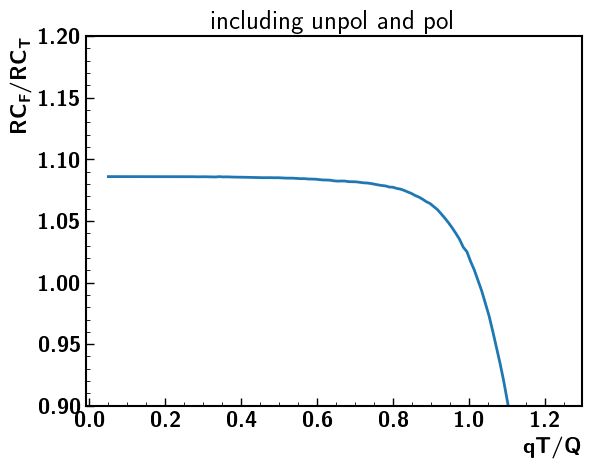

In [65]:
plt.figure()
F_Born_JLab2 = np.asarray(df_F_JLab_2_unpol_bn['xs'])
T_Born_JLab2 = np.asarray(df_T_jlab2_unpol['unpol_bn'])
R_Born_unpol_JLab2 = F_Born_JLab2/T_Born_JLab2
plt.plot(np.asarray(df_F_JLab_2_unpol_bn['qT_Q'])*0.375*math.sqrt(8),R_Born_unpol_JLab2,color='k')
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$R_{Born}$',fontsize=16)
plt.ylim(0.94,1.06)
#plt.title('including unpol')
plt.savefig('results/compare/Fine/compare_born_unpol_JLab2.pdf')


plt.figure()
F_RC_JLab2 = np.asarray(df_F_JLab_2_unpol_rc['xs'])
T_RC_JLab2 = np.asarray(df_T_jlab2_unpol['unpol_rc'])
RC_F = F_Born_JLab2/F_RC_JLab2
RC_T = (T_Born_JLab2/T_RC_JLab2)
plt.plot(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'])*0.375*math.sqrt(8),RC_F/RC_T,label='$RC_F/RC_T')
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$RC_F/RC_T$',fontsize =16)
plt.ylim(0.9,1.1)
plt.xlim(0,1.2)
#plt.title('including unpol')
plt.savefig('results/compare/Fine/compare_RC_unpol_Pt_JLab2.pdf')

plt.figure()
#F_RC_JLab2 = np.asarray(df_F_JLab_2_unpol_rc['xs'])
T_RC_JLab2_withexc = np.asarray(df_T_jlab2_unpol['unpol_rc']+jlab2_exc_interpolated)
#RC_F = F_Born_JLab2/F_RC_JLab2
RC_T = (T_Born_JLab2/T_RC_JLab2_withexc)
plt.plot(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'])*0.375*math.sqrt(8),RC_F/RC_T,label='$RC_F/RC_T',color='k')
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$RC_F/RC_T$',fontsize =16)
plt.ylim(0.9,1.25)
plt.xlim(0,1.2)
#plt.title('including unpol')
plt.savefig('results/compare/Fine/compare_RC_unpol_Pt_JLab2_withexc.pdf')


plt.figure()
plt.plot(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'])*0.375*math.sqrt(8),RC_F,label='Factorized')
plt.plot(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'])*0.375*math.sqrt(8),RC_T,label='Traditional')
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$RC$',fontsize =16)
plt.ylim(0.19,1.69)
plt.xlim(0,1.2)
#plt.title('including unpol')
#plt.savefig('results/compare/Fine/compare_RC_unpol_Pt_JLab2_RC_withexc.pdf')

fig=plt.figure()
ax=fig.add_subplot()
ax.plot(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'])*0.375*math.sqrt(8),RC_F,label='Factorized')
ax.plot(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'])*0.375*math.sqrt(8),RC_T,label='Traditional')
ax.set_xlabel('$P_{hT}(GeV/c)$',fontsize=16)
ax.set_ylabel('$RC$',fontsize =16)
plt.ylim(0.19,1.69)
plt.xlim(0,1.2)
ax.legend()
#plt.title('including unpol')
fig.savefig('results/compare/Fine/compare_RC_unpol_Pt_JLab2_RC_withexc.pdf')

fig11=plt.figure()
ax11=fig11.add_subplot()
RC_T_noexc = (T_Born_JLab2/T_RC_JLab2)
ax11.plot(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'])*0.375*math.sqrt(8),RC_T,color='black',label='with exc')
ax11.plot(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'])*0.375*math.sqrt(8),RC_T_noexc,label='without exc')
ax11.set_xlabel('$P_{hT}(GeV/c)$',fontsize=16)
ax11.set_ylabel('$RC$',fontsize =16)
plt.ylim(0.19,1.69)
plt.xlim(0,1.2)
ax11.legend()
#plt.title('including unpol')
fig11.savefig('results/compare/Fine/exc_rc_jlab2_Pt.pdf')


fig1 = plt.figure()
ax1 = fig1.add_subplot()
fig2 = plt.figure()
ax2 = fig2.add_subplot()
F_bnerr_JLab2 = np.asarray(df_F_JLab_2_unpol_bn['xs_err'])
T_bnerr_JLab2 = np.asarray(df_T_jlab2_unpol['unpol_bn_err'])
F_RCerr_JLab2 = np.asarray(df_F_JLab_2_unpol_rc['xs_err'])
T_RCerr_JLab2 = np.asarray(df_T_jlab2_unpol['unpol_rc_err'])
RC_Fs,RCerr_Fs=Get_error(F_Born_JLab2,F_bnerr_JLab2,F_RC_JLab2,F_RCerr_JLab2)
RC_Ts,RCerr_Ts=Get_error(T_Born_JLab2,T_bnerr_JLab2,T_RC_JLab2,T_RCerr_JLab2)
RC_ratios,RC_ratioerrs=Get_error(RC_Fs,RCerr_Fs,RC_Ts,RCerr_Ts)

ax1.fill_between(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'].to_list()),np.asarray(RC_Fs)-np.asarray(RCerr_Fs),np.asarray(RC_Fs)+np.asarray(RCerr_Fs),color='red',alpha=0.25,linewidth=0)
ax1.fill_between(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'].to_list()),np.asarray(RC_Ts)-np.asarray(RCerr_Ts),np.asarray(RC_Ts)+np.asarray(RCerr_Ts),color='blue',alpha=0.25,linewidth=0)
ax1.plot(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'].to_list()),RC_Fs,color='red',label='Factorized')
ax1.plot(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'].to_list()),RC_Ts,color='blue',label='Traditional')
ax1.set_xlabel('$qT/Q$',fontsize=16)
ax1.set_ylabel('RC',fontsize=16)
ax1.legend()
fig1.savefig('results/compare/Fine/RCs_both_JLab2.pdf')


ax2.fill_between(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'].to_list()),np.asarray(RC_ratios)-np.asarray(RC_ratioerrs),np.asarray(RC_ratios)+np.asarray(RC_ratioerrs),color='black',alpha=0.25,linewidth=0)
ax2.plot(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'].to_list()),RC_ratios,color='black')
ax2.set_xlabel('$qT/Q$',fontsize=16)
ax2.set_ylabel('$RC_F/RC_T$',fontsize=16)
fig2.savefig('results/compare/Fine/compare_RC_unpol_JLab2.pdf')

fig3 = plt.figure()
ax3 = fig3.add_subplot()
ax3.fill_between(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'].to_list())*0.375*math.sqrt(8),np.asarray(RC_Fs)-np.asarray(RCerr_Fs),np.asarray(RC_Fs)+np.asarray(RCerr_Fs),color='red',alpha=0.25,linewidth=0)
ax3.fill_between(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'].to_list())*0.375*math.sqrt(8),np.asarray(RC_Ts)-np.asarray(RCerr_Ts),np.asarray(RC_Ts)+np.asarray(RCerr_Ts),color='blue',alpha=0.25,linewidth=0)
ax3.plot(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'].to_list())*0.375*math.sqrt(8),RC_Fs,color='red',label='Factorized')
ax3.plot(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'].to_list())*0.375*math.sqrt(8),RC_Ts,color='blue',label='Traditional')
ax3.set_xlabel('$P_{hT}(GeV/c)$',fontsize=16)
ax3.set_ylabel(r'$\textbf{RC}$',fontsize=16)
ax3.legend()
plt.xlim(0,1.2)
fig3.savefig('results/compare/Fine/RCs_both_JLab2_Pt.pdf')

plt.figure()
plt.plot(np.asarray(df_F_JLab_2_unpol_rc['qT_Q'].to_list()),(np.asarray(RC_Fs)-np.asarray(RC_Ts))/(np.asarray(RC_Ts)-np.asarray(1)),color = 'black')
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel(r'$\frac{RC_F-RC_T}{RC_T}$',fontsize=16)
plt.ylim(0,0.5)
plt.xlim(0,0.8)
plt.savefig('results/compare/Fine/compare_RC_with1_unpol_JLab2.pdf')

plt.figure()
F_Born_JLab2 = np.asarray(df_F_JLab_2_unpol_bn['xs'])+np.asarray(df_F_JLab_2_siv_bn['xs'])+np.asarray(df_F_JLab_2_col_bn['xs'])
T_Born_JLab2 = np.asarray(df_T_jlab2_unpol['unpol_bn'])+np.asarray(df_T_jlab2_unpol['sivers_bn'])+np.asarray(df_T_jlab2_unpol['collins_bn'])
R_Born_JLab2 = F_Born_JLab2/T_Born_JLab2
plt.plot(np.asarray(df_F_JLab_2_unpol_bn['qT_Q']),R_Born_JLab2,color='b')
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$R_{Born}$',fontsize=16)
plt.ylim(0.94,1.06)
plt.title('including unpol and pol')
plt.savefig('results/compare/Fine/compare_born_both_JLab2.pdf')


plt.figure()
F_RC_JLab2 = np.asarray(df_F_JLab_2_unpol_rc['xs'])+np.asarray(df_F_JLab_2_siv_rc['xs'])+np.asarray(df_F_JLab_2_col_rc['xs'])
T_RC_JLab2 = np.asarray(df_T_jlab2_unpol['unpol_rc'])+np.asarray(df_T_jlab2_siv['sivers_rc'])+np.asarray(df_T_jlab2_col['collins_rc'])
RC_F = F_Born_JLab2/F_RC_JLab2
RC_T = (T_Born_JLab2/T_RC_JLab2)
plt.plot(np.asarray(df_F_JLab_2_unpol_rc['qT_Q']),RC_F/RC_T,label='$RC_F/RC_T')
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$RC_F/RC_T$',fontsize =16)
plt.ylim(0.9,1.2)
plt.title('including unpol and pol')
plt.savefig('results/compare/Fine/compare_RC_both_JLab2.pdf')

/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_42131/2620326657.py:10: RuntimeWarning: invalid value encountered in divide
  RC_T_siv_jlab2 = np.asarray(T_bn_siv_jlab2)/np.asarray(T_rc_siv_jlab2)
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_42131/2620326657.py:28: RuntimeWarning: invalid value encountered in divide
  RC_T_col_jlab2 = np.asarray(T_bn_col_jlab2)/np.asarray(T_rc_col_jlab2)


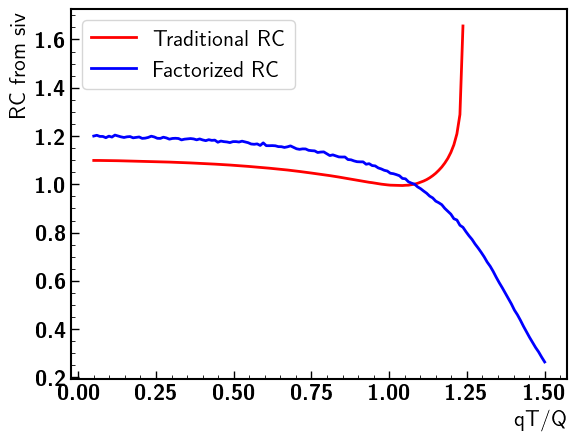

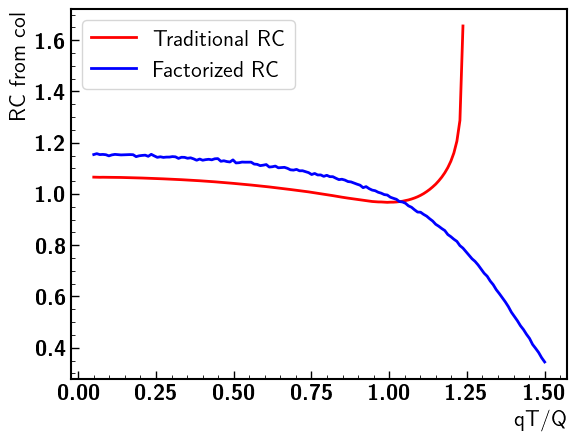

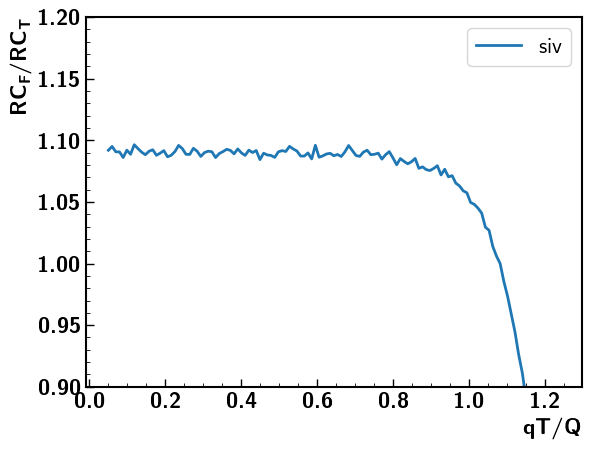

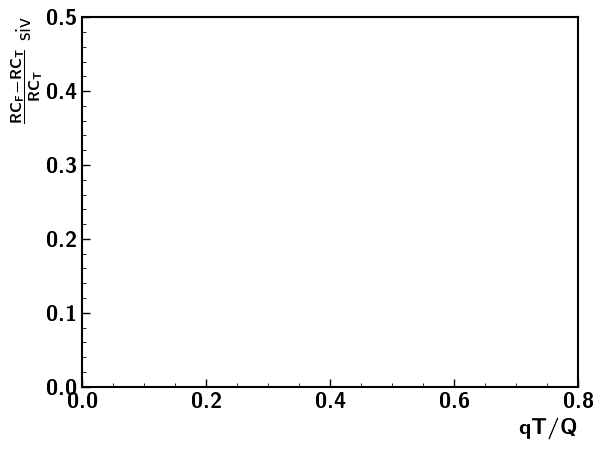

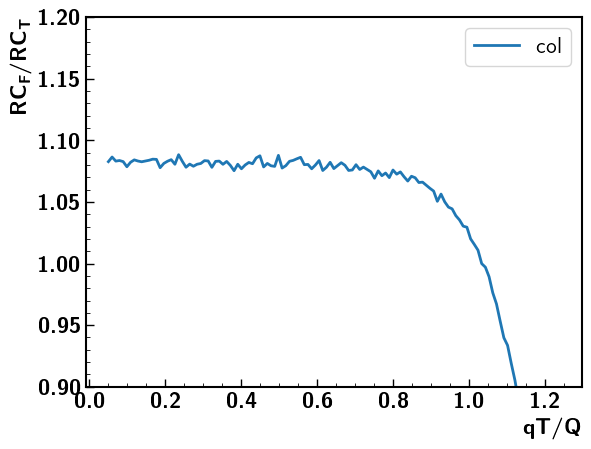

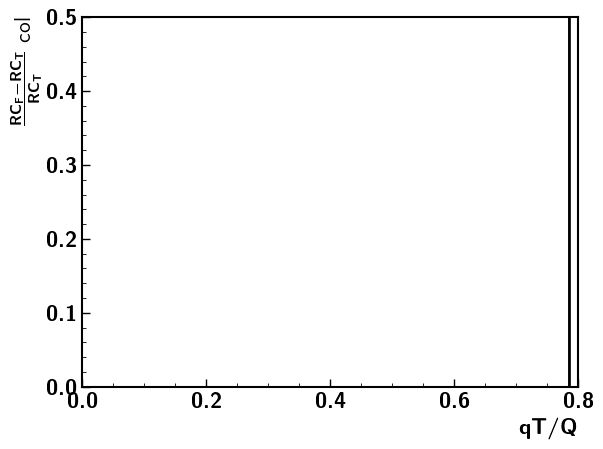

In [66]:
T_bn_qtQ_jlab2 = df_T_jlab2_siv['qt_to_Q'].to_list()
T_bn_siv_jlab2 = df_T_jlab2_siv['sivers_bn'].to_list()
F_bn_qtQ_JLab_2 = df_F_JLab_2_siv_bn['qT_Q'].to_list()
F_bn_siv_JLab_2 = df_F_JLab_2_siv_bn['xs'].to_list()
T_rc_qtQ_jlab2 = df_T_jlab2_siv['qt_to_Q'].to_list()
T_rc_siv_jlab2 = df_T_jlab2_siv['sivers_rc'].to_list()
F_rc_qtQ_JLab_2 = df_F_JLab_2_siv_rc['qT_Q'].to_list()
F_rc_siv_JLab_2 = df_F_JLab_2_siv_rc['xs'].to_list()
RC_F_siv_jlab2 = np.asarray(F_bn_siv_JLab_2)/np.asarray(F_rc_siv_JLab_2)
RC_T_siv_jlab2 = np.asarray(T_bn_siv_jlab2)/np.asarray(T_rc_siv_jlab2)
plt.plot(T_bn_qtQ_jlab2,RC_T_siv_jlab2,color='r',label='Traditional RC')
plt.plot(F_bn_qtQ_JLab_2,RC_F_siv_jlab2,color='b',label='Factorized RC')
plt.xlabel('qT/Q',fontsize =16)
plt.ylabel('RC from siv',fontsize =16)
plt.legend()
plt.savefig('results/compare/Fine/RCs_siv_both_JLab2.pdf')

plt.figure()
T_bn_qtQ_jlab2 = df_T_jlab2_col['qt_to_Q'].to_list()
T_bn_col_jlab2 = df_T_jlab2_col['collins_bn'].to_list()
F_bn_qtQ_JLab_2 = df_F_JLab_2_col_bn['qT_Q'].to_list()
F_bn_col_JLab_2 = df_F_JLab_2_col_bn['xs'].to_list()
T_rc_qtQ_jlab2 = df_T_jlab2_col['qt_to_Q'].to_list()
T_rc_col_jlab2 = df_T_jlab2_col['collins_rc'].to_list()
F_rc_qtQ_JLab_2 = df_F_JLab_2_col_rc['qT_Q'].to_list()
F_rc_col_JLab_2 = df_F_JLab_2_col_rc['xs'].to_list()
RC_F_col_jlab2 = np.asarray(F_bn_col_JLab_2)/np.asarray(F_rc_col_JLab_2)
RC_T_col_jlab2 = np.asarray(T_bn_col_jlab2)/np.asarray(T_rc_col_jlab2)
plt.plot(T_bn_qtQ_jlab2,RC_T_col_jlab2,color='r',label='Traditional RC')
plt.plot(F_bn_qtQ_JLab_2,RC_F_col_jlab2,color='b',label='Factorized RC')
plt.xlabel('qT/Q',fontsize =16)
plt.ylabel('RC from col',fontsize =16)
plt.legend()
plt.savefig('results/compare/Fine/RCs_col_both_JLab2.pdf')

plt.figure()
RC_FT_siv = RC_F_siv_jlab2/RC_T_siv_jlab2
plt.plot(T_bn_qtQ_jlab2,RC_FT_siv,label='siv')
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$RC_F/RC_T$',fontsize =16)
plt.legend()
plt.ylim(0.9,1.2)
plt.savefig('results/compare/Fine/compare_RC_siv_jlab2.pdf')
plt.figure()
plt.plot(T_bn_qtQ_jlab2,(np.asarray(RC_F_siv_jlab2)-np.asarray(RC_T_siv_jlab2))/(np.asarray(RC_T_siv_jlab2)-np.asarray(1)),color = 'black')
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel(r'$\frac{RC_F-RC_T}{RC_T}$ siv',fontsize=16)
plt.ylim(0,0.5)
plt.xlim(0,0.8)
plt.savefig('results/compare/Fine/compare_RC_with1_siv_jlab2.pdf')
plt.figure()
RC_FT_col = RC_F_col_jlab2/RC_T_col_jlab2
plt.plot(T_bn_qtQ_jlab2,RC_FT_col,label='col')
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$RC_F/RC_T$',fontsize =16)
plt.legend()
plt.ylim(0.9,1.2)
plt.savefig('results/compare/Fine/compare_RC_col_jlab2.pdf')
plt.figure()
plt.plot(T_bn_qtQ_jlab2,(np.asarray(RC_F_col_jlab2)-np.asarray(RC_T_col_jlab2))/(np.asarray(RC_T_col_jlab2)-np.asarray(1)),color = 'black')
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel(r'$\frac{RC_F-RC_T}{RC_T}$ col',fontsize=16)
plt.ylim(0,0.5)
plt.xlim(0,0.8)
plt.savefig('results/compare/Fine/compare_RC_with1_col_jlab2.pdf')

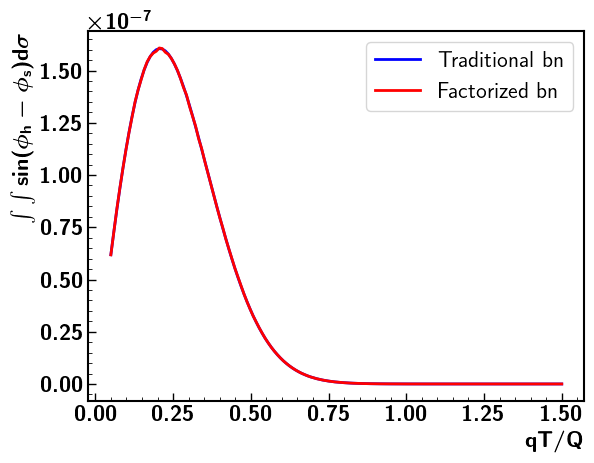

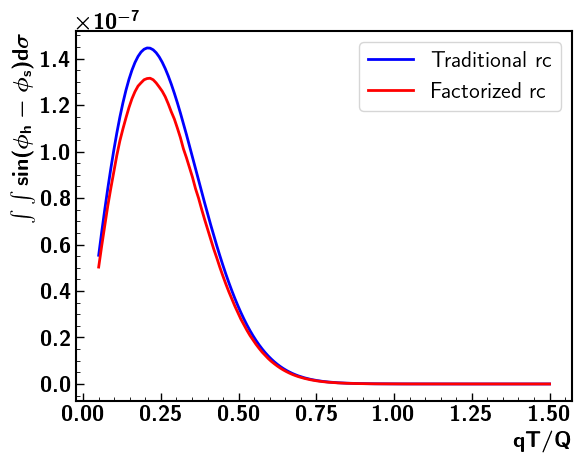

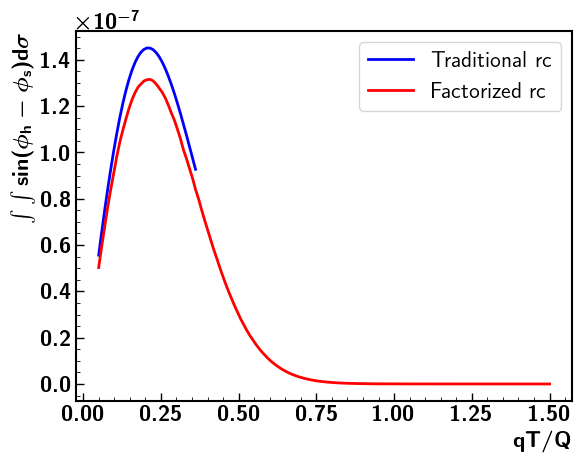

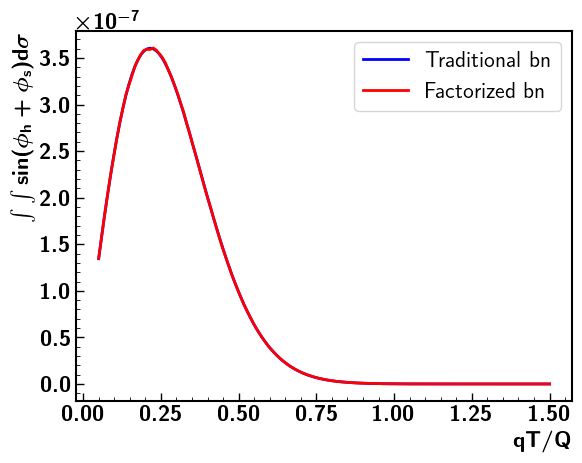

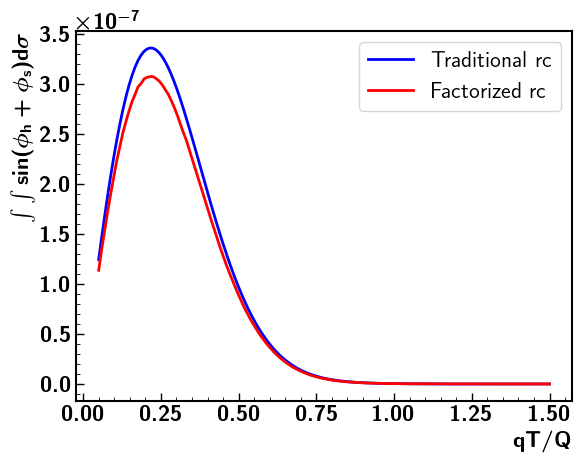

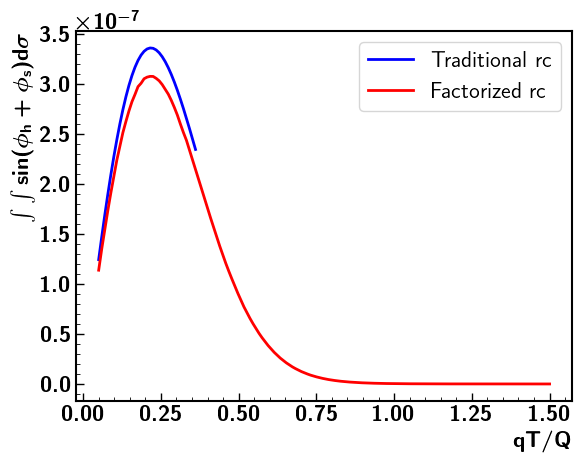

In [67]:
#plt.plot(np.asarray(df_T_JLab3['qt_to_Q']),df_T_JLab3['sivers_bn'],color='b',label='Tra bn rough')
#plt.plot(np.asarray(df_F_JLab3_siv_bn['qT_Q']),df_F_JLab3_siv_bn['xs'],color='r',label='Fac bn rough')

plt.plot(np.asarray(df_T_jlab3_siv['qt_to_Q']),df_T_jlab3_siv['sivers_bn'],color='b',label='Traditional bn')
plt.plot(np.asarray(df_F_JLab_3_siv_bn['qT_Q']),df_F_JLab_3_siv_bn['xs'],color='r',label='Factorized bn')
#plt.xlim(0,0.7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h-\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justsiv_bn_jlab3.pdf')

plt.figure()
#plt.plot(np.asarray(df_T_JLab3['qt_to_Q']),df_T_JLab3['sivers_rc'],color='b',label='Tra rc rough')
#plt.plot(np.asarray(df_F_JLab3_siv_rc['qT_Q']),df_F_JLab3_siv_rc['xs'],color='r',label='Fac rc rough')

plt.plot(np.asarray(df_T_jlab3_siv['qt_to_Q']),df_T_jlab3_siv['sivers_rc'],color='b',label='Traditional rc')
plt.plot(np.asarray(df_F_JLab_3_siv_rc['qT_Q']),df_F_JLab_3_siv_rc['xs'],color='r',label='Factorized rc')
#plt.xlim(0,0.7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h-\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justsiv_rc_jlab3.pdf')

plt.figure()
#plt.plot(np.asarray(df_T_JLab3['qt_to_Q']),df_T_JLab3['sivers_rc'],color='b',label='Tra rc rough')
#plt.plot(np.asarray(df_F_JLab3_siv_rc['qT_Q']),df_F_JLab3_siv_rc['xs'],color='r',label='Fac rc rough')

plt.plot(np.asarray(df_T_jlab3_siv['qt_to_Q']),df_T_jlab3_siv['sivers_rc']+jlab3siv_exc,color='b',label='Traditional rc')
plt.plot(np.asarray(df_F_JLab_3_siv_rc['qT_Q']),df_F_JLab_3_siv_rc['xs'],color='r',label='Factorized rc')
#plt.xlim(0,0.7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h-\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justsiv_excrc_jlab3.pdf')

plt.figure()
#plt.plot(np.asarray(df_T_JLab3['qt_to_Q']),df_T_JLab3['collins_bn'],color='b',linestyle='-.',label='Tra bn rough')
#plt.plot(np.asarray(df_F_JLab3_col_bn['qT_Q']),df_F_JLab3_col_bn['xs'],color='r',linestyle='-.',label='Fac bn rough')

plt.plot(np.asarray(df_T_jlab3_col['qt_to_Q']),df_T_jlab3_col['collins_bn'],color='b',label='Traditional bn')
plt.plot(np.asarray(df_F_JLab_3_col_bn['qT_Q']),df_F_JLab_3_col_bn['xs'],color='r',label='Factorized bn')
#plt.xlim(0,0.7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h+\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justcol_bn_jlab3.pdf')

plt.figure()
#plt.plot(np.asarray(df_T_JLab3['qt_to_Q']),df_T_JLab3['collins_rc'],color='b',linestyle='-.',label='Tra rc rough')
#plt.plot(np.asarray(df_F_JLab3_col_rc['qT_Q']),df_F_JLab3_col_rc['xs'],color='r',linestyle='-.',label='Fac rc rough')

plt.plot(np.asarray(df_T_jlab3_col['qt_to_Q']),df_T_jlab3_col['collins_rc'],color='b',linestyle='-',label='Traditional rc')
plt.plot(np.asarray(df_F_JLab_3_col_rc['qT_Q']),df_F_JLab_3_col_rc['xs'],color='r',linestyle='-',label='Factorized rc')
#plt.xlim(0,0.7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h+\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justcol_rc_jlab3.pdf')

plt.figure()
#plt.plot(np.asarray(df_T_JLab3['qt_to_Q']),df_T_JLab3['collins_rc'],color='b',linestyle='-.',label='Tra rc rough')
#plt.plot(np.asarray(df_F_JLab3_col_rc['qT_Q']),df_F_JLab3_col_rc['xs'],color='r',linestyle='-.',label='Fac rc rough')

plt.plot(np.asarray(df_T_jlab3_col['qt_to_Q']),df_T_jlab3_col['collins_rc']+jlab3col_exc,color='b',linestyle='-',label='Traditional rc')
plt.plot(np.asarray(df_F_JLab_3_col_rc['qT_Q']),df_F_JLab_3_col_rc['xs'],color='r',linestyle='-',label='Factorized rc')
#plt.xlim(0,0.7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h+\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justcol_excrc_jlab3.pdf')

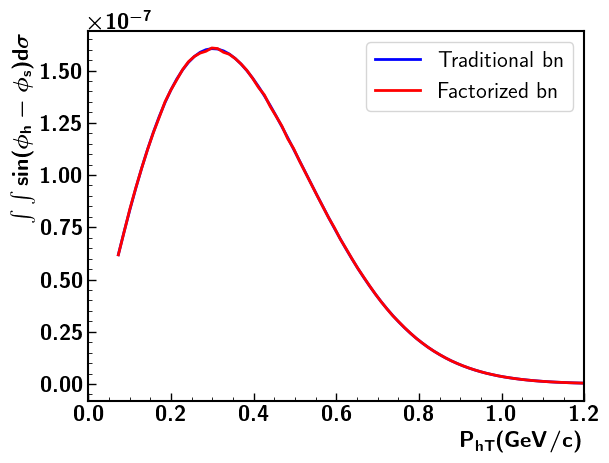

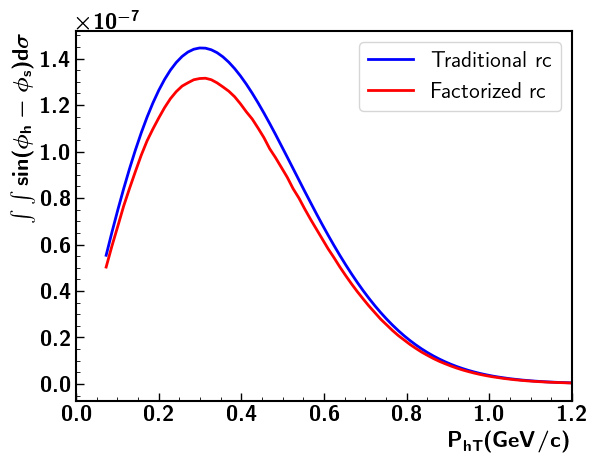

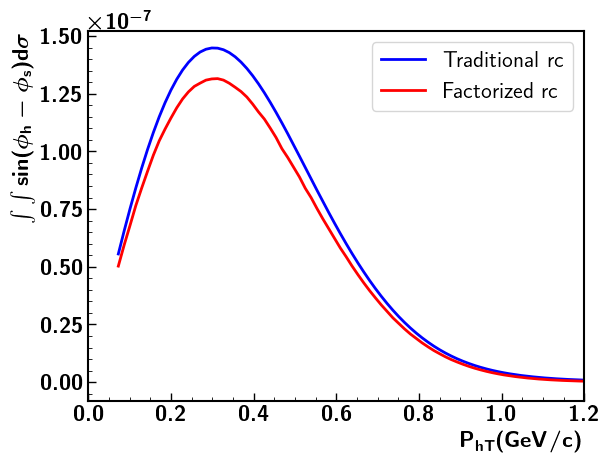

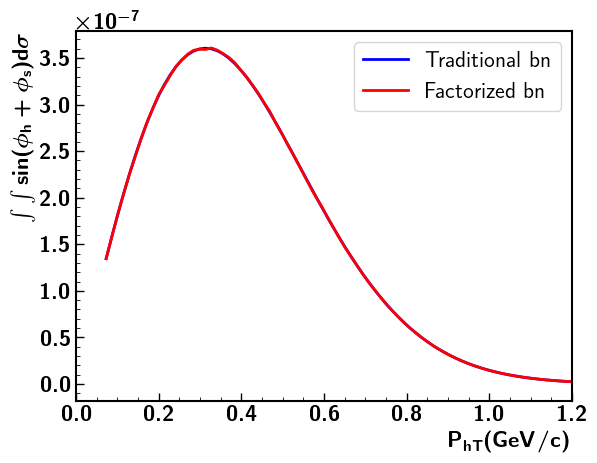

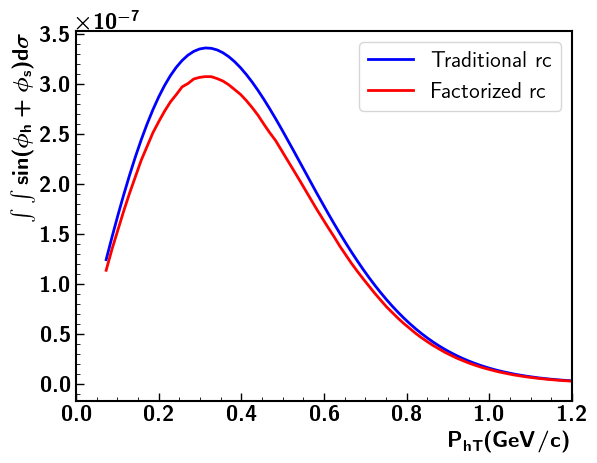

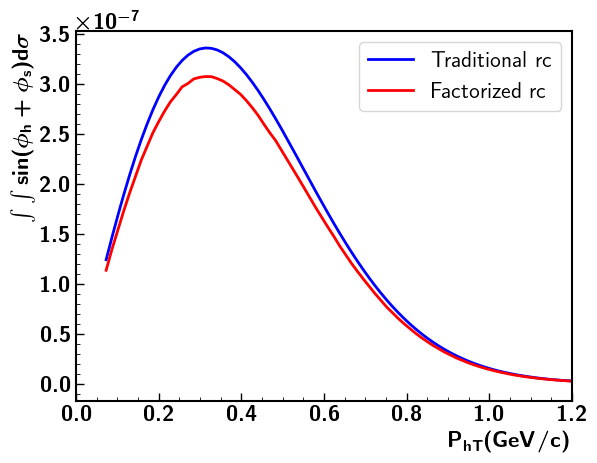

In [68]:
#plt.plot(np.asarray(df_T_JLab3['qt_to_Q']),df_T_JLab3['sivers_bn'],color='b',label='Tra bn rough')
#plt.plot(np.asarray(df_F_JLab3_siv_bn['qT_Q']),df_F_JLab3_siv_bn['xs'],color='r',label='Fac bn rough')

plt.plot(np.asarray(df_T_jlab3_siv['qt_to_Q'])*0.375*np.sqrt(15),df_T_jlab3_siv['sivers_bn'],color='b',label='Traditional bn')
plt.plot(np.asarray(df_F_JLab_3_siv_bn['qT_Q'])*0.375*np.sqrt(15),df_F_JLab_3_siv_bn['xs'],color='r',label='Factorized bn')
plt.xlim(0,1.2)
plt.legend()
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h-\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justsiv_bn_jlab3_Pt.pdf')

plt.figure()
#plt.plot(np.asarray(df_T_JLab3['qt_to_Q']),df_T_JLab3['sivers_rc'],color='b',label='Tra rc rough')
#plt.plot(np.asarray(df_F_JLab3_siv_rc['qT_Q']),df_F_JLab3_siv_rc['xs'],color='r',label='Fac rc rough')

plt.plot(np.asarray(df_T_jlab3_siv['qt_to_Q'])*0.375*np.sqrt(15),df_T_jlab3_siv['sivers_rc'],color='b',label='Traditional rc')
plt.plot(np.asarray(df_F_JLab_3_siv_rc['qT_Q'])*0.375*np.sqrt(15),df_F_JLab_3_siv_rc['xs'],color='r',label='Factorized rc')
plt.xlim(0,1.2)
plt.legend()
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h-\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justsiv_rc_jlab3_Pt.pdf')
plt.figure()
#plt.plot(np.asarray(df_T_JLab3['qt_to_Q']),df_T_JLab3['sivers_rc'],color='b',label='Tra rc rough')
#plt.plot(np.asarray(df_F_JLab3_siv_rc['qT_Q']),df_F_JLab3_siv_rc['xs'],color='r',label='Fac rc rough')

plt.plot(np.asarray(df_T_jlab3_siv['qt_to_Q'])*0.375*np.sqrt(15),df_T_jlab3_siv['sivers_rc']+jlab3siv_exc_interpolated,color='b',label='Traditional rc')
plt.plot(np.asarray(df_F_JLab_3_siv_rc['qT_Q'])*0.375*np.sqrt(15),df_F_JLab_3_siv_rc['xs'],color='r',label='Factorized rc')
plt.xlim(0,1.2)
plt.legend()
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h-\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justsiv_excrc_jlab3_Pt.pdf')

plt.figure()
#plt.plot(np.asarray(df_T_JLab3['qt_to_Q']),df_T_JLab3['collins_bn'],color='b',linestyle='-.',label='Tra bn rough')
#plt.plot(np.asarray(df_F_JLab3_col_bn['qT_Q']),df_F_JLab3_col_bn['xs'],color='r',linestyle='-.',label='Fac bn rough')

plt.plot(np.asarray(df_T_jlab3_col['qt_to_Q'])*0.375*np.sqrt(15),df_T_jlab3_col['collins_bn'],color='b',label='Traditional bn')
plt.plot(np.asarray(df_F_JLab_3_col_bn['qT_Q'])*0.375*np.sqrt(15),df_F_JLab_3_col_bn['xs'],color='r',label='Factorized bn')
plt.xlim(0,1.2)
plt.legend()
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h+\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justcol_bn_jlab3_Pt.pdf')

plt.figure()
#plt.plot(np.asarray(df_T_JLab3['qt_to_Q']),df_T_JLab3['collins_rc'],color='b',linestyle='-.',label='Tra rc rough')
#plt.plot(np.asarray(df_F_JLab3_col_rc['qT_Q']),df_F_JLab3_col_rc['xs'],color='r',linestyle='-.',label='Fac rc rough')

plt.plot(np.asarray(df_T_jlab3_col['qt_to_Q'])*0.375*np.sqrt(15),df_T_jlab3_col['collins_rc'],color='b',linestyle='-',label='Traditional rc')
plt.plot(np.asarray(df_F_JLab_3_col_rc['qT_Q'])*0.375*np.sqrt(15),df_F_JLab_3_col_rc['xs'],color='r',linestyle='-',label='Factorized rc')
plt.xlim(0,1.2)
plt.legend()
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h+\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justcol_rc_jlab3_Pt.pdf')
plt.figure()
#plt.plot(np.asarray(df_T_JLab3['qt_to_Q']),df_T_JLab3['collins_rc'],color='b',linestyle='-.',label='Tra rc rough')
#plt.plot(np.asarray(df_F_JLab3_col_rc['qT_Q']),df_F_JLab3_col_rc['xs'],color='r',linestyle='-.',label='Fac rc rough')

plt.plot(np.asarray(df_T_jlab3_col['qt_to_Q'])*0.375*np.sqrt(15),df_T_jlab3_col['collins_rc']+jlab3col_exc_interpolated,color='b',linestyle='-',label='Traditional rc')
plt.plot(np.asarray(df_F_JLab_3_col_rc['qT_Q'])*0.375*np.sqrt(15),df_F_JLab_3_col_rc['xs'],color='r',linestyle='-',label='Factorized rc')
plt.xlim(0,1.2)
plt.legend()
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$\int \int sin(\phi_h+\phi_s)d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/justcol_excrc_jlab3_Pt.pdf')

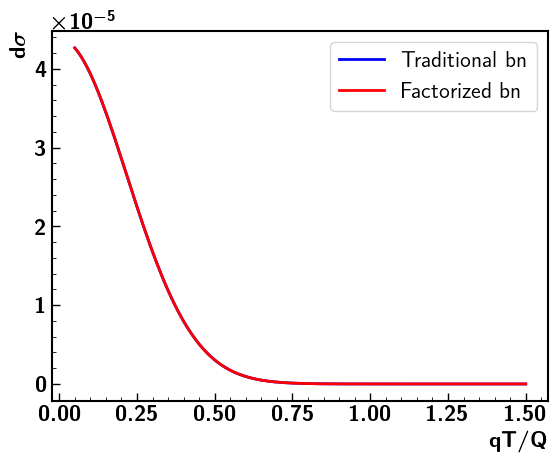

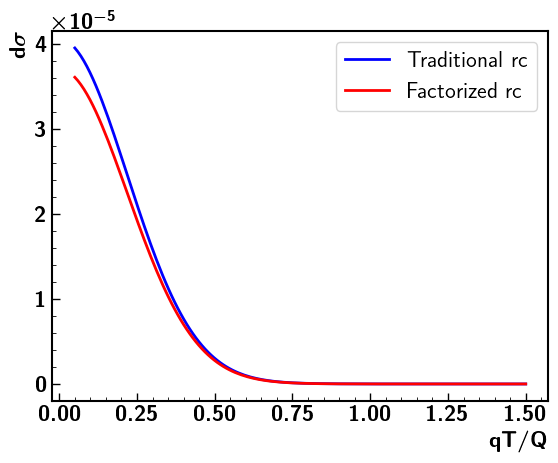

In [69]:
#plt.plot(np.asarray(df_T_JLab3['qt_to_Q']),df_T_JLab3['unpol_bn'],color='b',label='Tra bn rough')
#plt.plot(np.asarray(df_F_JLab3_unpol_bn['qT_Q']),df_F_JLab3_unpol_bn['xs'],color='r',label='Fac bn rough')

plt.plot(np.asarray(df_T_jlab3_unpol['qt_to_Q']),df_T_jlab3_unpol['unpol_bn'],color='b',label='Traditional bn')
plt.plot(np.asarray(df_F_JLab_3_unpol_bn['qT_Q']),df_F_JLab_3_unpol_bn['xs'],color='r',label='Factorized bn')
#plt.xlim(0.7,1.4)
#plt.ylim(0,5e-7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/unpol_bn_JLab3.pdf')

plt.figure()
#plt.plot(np.asarray(df_T_JLab3['qt_to_Q']),df_T_JLab3['unpol_rc'],color='b',label='Tra rc rough')
#plt.plot(np.asarray(df_F_JLab3_unpol_rc['qT_Q']),df_F_JLab3_unpol_rc['xs'],color='r',label='Fac rc rough')

plt.plot(np.asarray(df_T_jlab3_unpol['qt_to_Q']),df_T_jlab3_unpol['unpol_rc'],color='b',label='Traditional rc')
plt.plot(np.asarray(df_F_JLab_3_unpol_rc['qT_Q']),df_F_JLab_3_unpol_rc['xs'],color='r',label='Factorized rc')
#plt.xlim(0.7,1.4)
#plt.ylim(0,5e-7)
plt.legend()
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$d\sigma$',fontsize =16)
plt.savefig('results/compare/Fine/unpol_rc_JLab3.pdf')

/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_42131/3719212757.py:4: RuntimeWarning: divide by zero encountered in divide
  R_Born_JLab3 = F_Born_JLab3/T_Born_JLab3
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_42131/3719212757.py:17: RuntimeWarning: invalid value encountered in divide
  RC_T = (T_Born_JLab3/T_RC_JLab3)
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_42131/3719212757.py:31: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.asarray(df_F_JLab_3_unpol_rc['qT_Q'])*0.375*math.sqrt(15),RC_F/RC_T,label='$RC_F/RC_T',color='k')
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_42131/3719212757.py:64: RuntimeWarning: invalid value encountered in divide
  RC_T_noexc = (T_Born_JLab3/T_RC_JLab3)
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_42131/2725842912.py:13: RuntimeWarning: invalid value encountered in double_scalars
  ratio = value1[i]/value2[i]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipyker

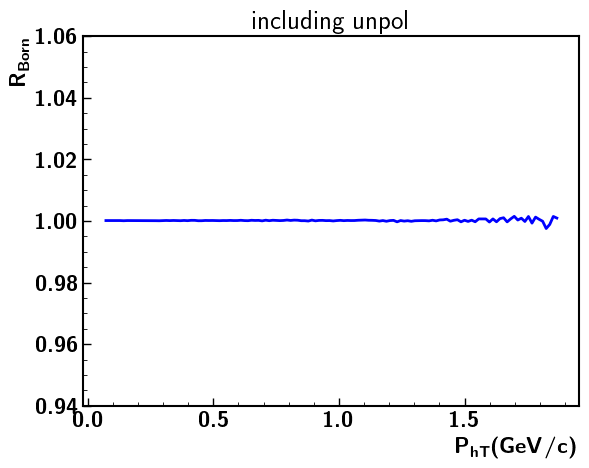

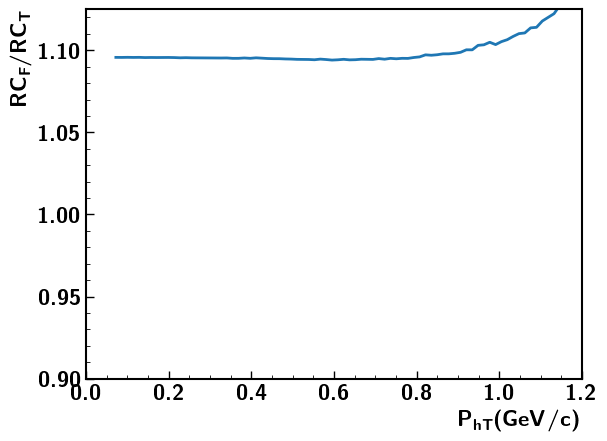

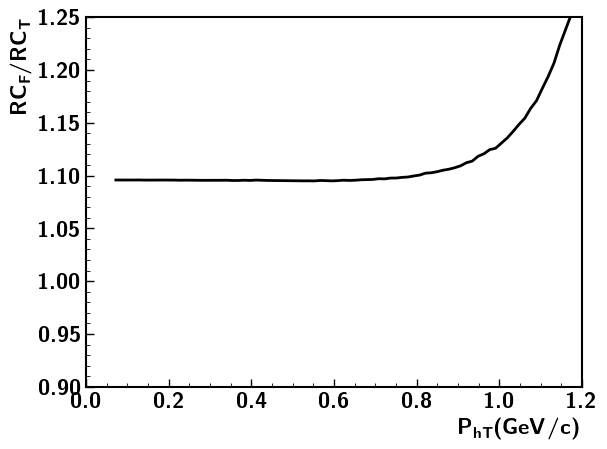

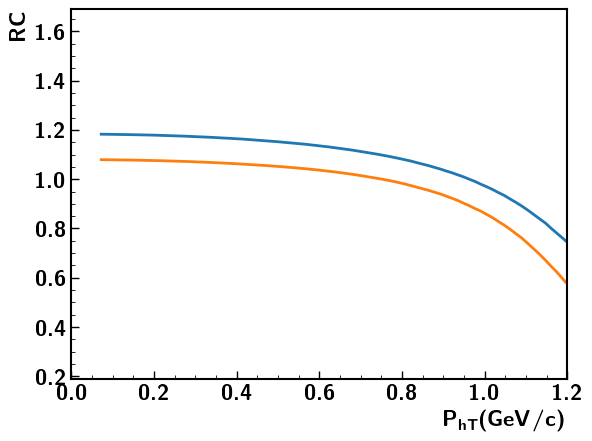

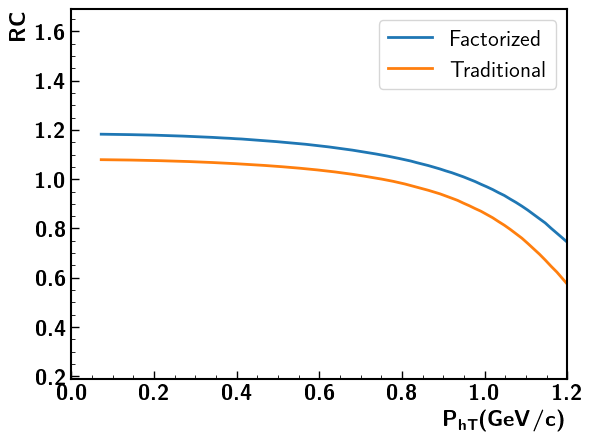

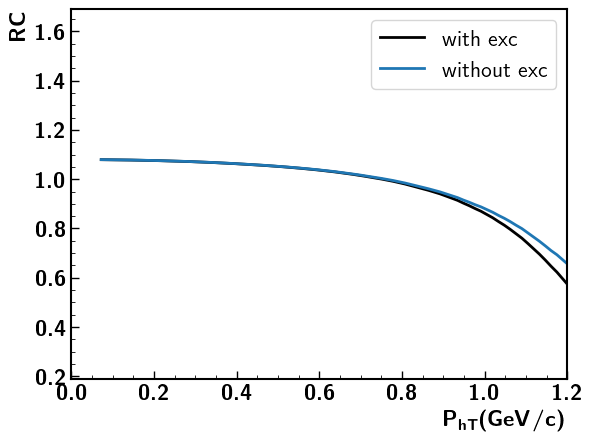

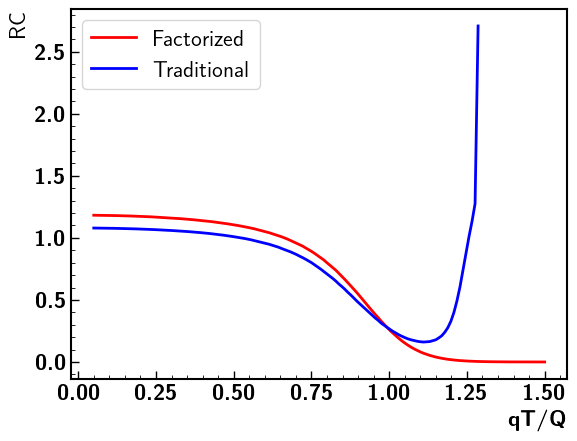

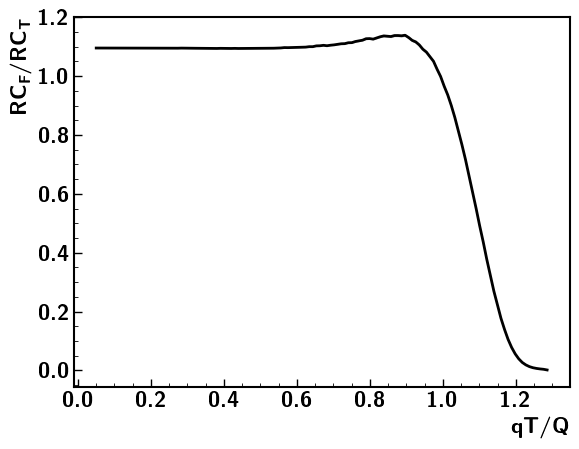

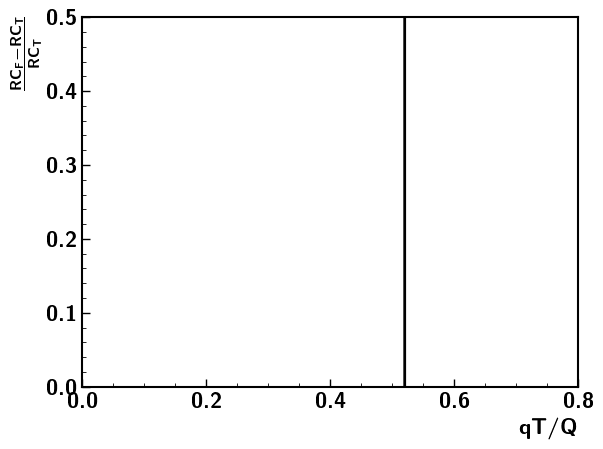

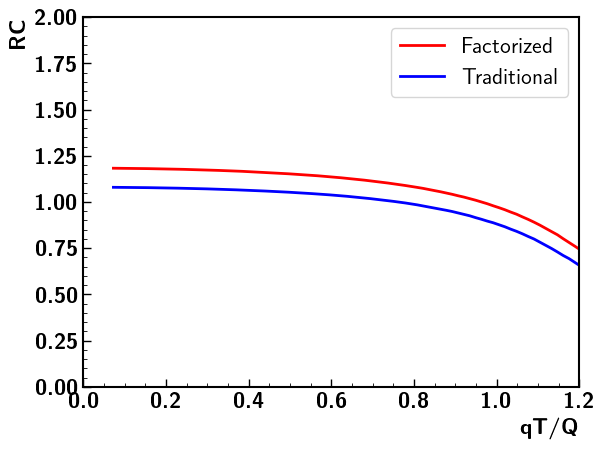

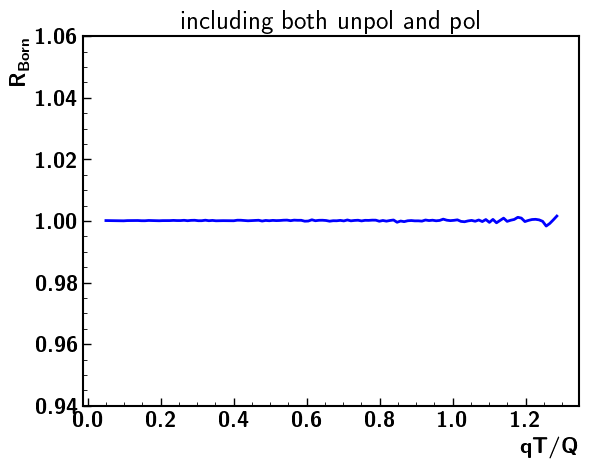

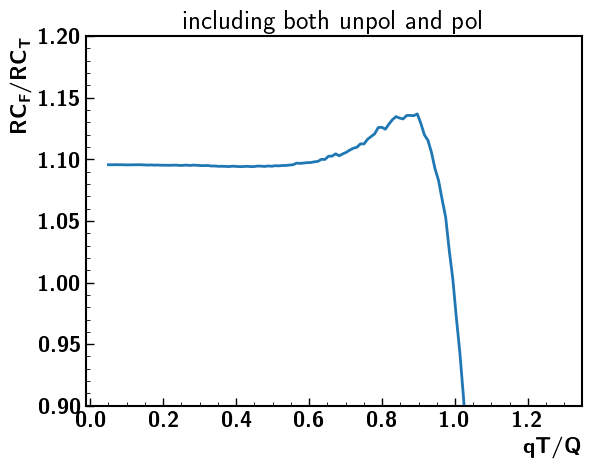

In [70]:
plt.figure()
F_Born_JLab3 = np.asarray(df_F_JLab_3_unpol_bn['xs'])
T_Born_JLab3 = np.asarray(df_T_jlab3_unpol['unpol_bn'])
R_Born_JLab3 = F_Born_JLab3/T_Born_JLab3
plt.plot(np.asarray(df_F_JLab_3_unpol_bn['qT_Q'])*0.375*math.sqrt(15),R_Born_JLab3,color='b')
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$R_{Born}$',fontsize=16)
plt.ylim(0.94,1.06)
plt.title('including unpol')
plt.savefig('results/compare/Fine/compare_born_unpol_JLab3.pdf')


plt.figure()
F_RC_JLab3 = np.asarray(df_F_JLab_3_unpol_rc['xs'])
T_RC_JLab3 = np.asarray(df_T_jlab3_unpol['unpol_rc'])
RC_F = F_Born_JLab3/F_RC_JLab3
RC_T = (T_Born_JLab3/T_RC_JLab3)
plt.plot(np.asarray(df_F_JLab_3_unpol_rc['qT_Q'])*0.375*math.sqrt(15),RC_F/RC_T,label='$RC_F/RC_T')
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$RC_F/RC_T$',fontsize =16)
plt.ylim(0.9,1.125)
plt.xlim(0,1.2)
#plt.title('including unpol')
plt.savefig('results/compare/Fine/compare_RC_unpol_Pt_JLab3.pdf')

plt.figure()
#F_RC_JLab3 = np.asarray(df_F_JLab_3_unpol_rc['xs'])
T_RC_JLab3_withexc = np.asarray(df_T_jlab3_unpol['unpol_rc']+jlab3_exc_interpolated)
#RC_F = F_Born_JLab2/F_RC_JLab2
RC_T = (T_Born_JLab3/T_RC_JLab3_withexc)
plt.plot(np.asarray(df_F_JLab_3_unpol_rc['qT_Q'])*0.375*math.sqrt(15),RC_F/RC_T,label='$RC_F/RC_T',color='k')
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$RC_F/RC_T$',fontsize =16)
plt.ylim(0.9,1.25)
plt.xlim(0,1.2)
#plt.title('including unpol')
plt.savefig('results/compare/Fine/compare_RC_unpol_Pt_JLab3_withexc.pdf')


plt.figure()
plt.plot(np.asarray(df_F_JLab_3_unpol_rc['qT_Q'])*0.375*math.sqrt(15),RC_F,label='Factorized')
plt.plot(np.asarray(df_F_JLab_3_unpol_rc['qT_Q'])*0.375*math.sqrt(15),RC_T,label='Traditional')
plt.xlabel('$P_{hT}(GeV/c)$',fontsize=16)
plt.ylabel('$RC$',fontsize =16)
plt.ylim(0.19,1.69)
plt.xlim(0,1.2)
#plt.title('including unpol')
#plt.savefig('results/compare/Fine/compare_RC_unpol_Pt_JLab2_RC_withexc.pdf')

fig=plt.figure()
ax=fig.add_subplot()
ax.plot(np.asarray(df_F_JLab_3_unpol_rc['qT_Q'])*0.375*math.sqrt(15),RC_F,label='Factorized')
ax.plot(np.asarray(df_F_JLab_3_unpol_rc['qT_Q'])*0.375*math.sqrt(15),RC_T,label='Traditional')
ax.set_xlabel('$P_{hT}(GeV/c)$',fontsize=16)
ax.set_ylabel('$RC$',fontsize =16)
plt.ylim(0.19,1.69)
plt.xlim(0,1.2)
ax.legend()
#plt.title('including unpol')
fig.savefig('results/compare/Fine/compare_RC_unpol_Pt_JLab3_RC_withexc.pdf')

fig11=plt.figure()
ax11=fig11.add_subplot()
RC_T_noexc = (T_Born_JLab3/T_RC_JLab3)
ax11.plot(np.asarray(df_F_JLab_3_unpol_rc['qT_Q'])*0.375*math.sqrt(15),RC_T,color='black',label='with exc')
ax11.plot(np.asarray(df_F_JLab_3_unpol_rc['qT_Q'])*0.375*math.sqrt(15),RC_T_noexc,label='without exc')
ax11.set_xlabel('$P_{hT}(GeV/c)$',fontsize=16)
ax11.set_ylabel('$RC$',fontsize =16)
plt.ylim(0.19,1.69)
plt.xlim(0,1.2)
ax11.legend()
#plt.title('including unpol')
fig11.savefig('results/compare/Fine/exc_rc_jlab3_Pt.pdf')

fig1 = plt.figure()
ax1 = fig1.add_subplot()
fig2 = plt.figure()
ax2 = fig2.add_subplot()
F_bnerr_JLab3 = np.asarray(df_F_JLab_3_unpol_bn['xs_err'])
T_bnerr_JLab3 = np.asarray(df_T_jlab3_unpol['unpol_bn_err'])
F_RCerr_JLab3 = np.asarray(df_F_JLab_3_unpol_rc['xs_err'])
T_RCerr_JLab3 = np.asarray(df_T_jlab3_unpol['unpol_rc_err'])
RC_Fs,RCerr_Fs=Get_error(F_Born_JLab3,F_bnerr_JLab3,F_RC_JLab3,F_RCerr_JLab3)
RC_Ts,RCerr_Ts=Get_error(T_Born_JLab3,T_bnerr_JLab3,T_RC_JLab3,T_RCerr_JLab3)
RC_ratios,RC_ratioerrs=Get_error(RC_Fs,RCerr_Fs,RC_Ts,RCerr_Ts)

#ax1.fill_between(np.asarray(df_F_JLab_3_unpol_rc['qT_Q'].to_list()),np.asarray(RC_Fs)-np.asarray(RCerr_Fs),np.asarray(RC_Fs)+np.asarray(RCerr_Fs),color='red',alpha=0.25,linewidth=0)
#ax1.fill_between(np.asarray(df_F_JLab_3_unpol_rc['qT_Q'].to_list()),np.asarray(RC_Ts)-np.asarray(RCerr_Ts),np.asarray(RC_Ts)+np.asarray(RCerr_Ts),color='blue',alpha=0.25,linewidth=0)
ax1.plot(np.asarray(df_F_JLab_3_unpol_rc['qT_Q'].to_list()),RC_Fs,color='red',label='Factorized')
ax1.plot(np.asarray(df_F_JLab_3_unpol_rc['qT_Q'].to_list()),RC_Ts,color='blue',label='Traditional')
ax1.set_xlabel('$qT/Q$',fontsize=16)
ax1.set_ylabel('RC',fontsize=16)
ax1.legend()
fig1.savefig('results/compare/Fine/RCs_both_JLab3.pdf')
ax2.fill_between(np.asarray(df_F_JLab_3_unpol_rc['qT_Q'].to_list()),np.asarray(RC_ratios)-np.asarray(RC_ratioerrs),np.asarray(RC_ratios)+np.asarray(RC_ratioerrs),color='black',alpha=0.25,linewidth=0)
ax2.plot(np.asarray(df_F_JLab_3_unpol_rc['qT_Q'].to_list()),RC_ratios,color='black')
ax2.set_xlabel('$qT/Q$',fontsize=16)
ax2.set_ylabel('$RC_F/RC_T$',fontsize=16)
fig2.savefig('results/compare/Fine/compare_RC_unpol_JLab3.pdf')
plt.figure()
plt.plot(np.asarray(df_F_JLab_3_unpol_rc['qT_Q'].to_list()),(np.asarray(RC_Fs)-np.asarray(RC_Ts))/(np.asarray(RC_Ts)-np.asarray(1)),color = 'black')
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel(r'$\frac{RC_F-RC_T}{RC_T}$',fontsize=16)
plt.ylim(0,0.5)
plt.xlim(0,0.8)
plt.savefig('results/compare/Fine/compare_RC_with1_unpol_JLab3.pdf')

plt.figure()
plt.plot(np.asarray(df_F_JLab_3_unpol_rc['qT_Q'].to_list())*0.375*math.sqrt(15),RC_Fs,color='red',label='Factorized')
plt.plot(np.asarray(df_F_JLab_3_unpol_rc['qT_Q'].to_list())*0.375*math.sqrt(15),RC_Ts,color='blue',label='Traditional')
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel(r'$\textbf{RC}$',fontsize=16)
plt.legend()
plt.xlim(0,1.2)
plt.ylim(0,2)
plt.savefig('results/compare/Fine/RCs_both_JLab3_Pt.pdf')

plt.figure()
F_Born_JLab3 = np.asarray(df_F_JLab_3_unpol_bn['xs'])+np.asarray(df_F_JLab_3_siv_bn['xs'])+np.asarray(df_F_JLab_3_col_bn['xs'])
T_Born_JLab3 = np.asarray(df_T_jlab3_unpol['unpol_bn'])+np.asarray(df_T_jlab3_unpol['sivers_bn'])+np.asarray(df_T_jlab3_unpol['collins_bn'])
R_Born_JLab3 = F_Born_JLab3/T_Born_JLab3
plt.plot(np.asarray(df_F_JLab_3_unpol_bn['qT_Q']),R_Born_JLab3,color='b')
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$R_{Born}$',fontsize=16)
plt.ylim(0.94,1.06)
plt.title('including both unpol and pol')
plt.savefig('results/compare/Fine/compare_born_both_JLab3.pdf')



plt.figure()
F_RC_JLab3 = np.asarray(df_F_JLab_3_unpol_rc['xs'])+np.asarray(df_F_JLab_3_siv_rc['xs'])+np.asarray(df_F_JLab_3_col_rc['xs'])
T_RC_JLab3 = np.asarray(df_T_jlab3_unpol['unpol_rc'])+np.asarray(df_T_jlab3_siv['sivers_rc'])+np.asarray(df_T_jlab3_col['collins_rc'])
RC_F = F_Born_JLab3/F_RC_JLab3
RC_T = (T_Born_JLab3/T_RC_JLab3)
plt.plot(np.asarray(df_F_JLab_3_unpol_rc['qT_Q']),RC_F/RC_T,label='$RC_F/RC_T')
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$RC_F/RC_T$',fontsize =16)
plt.ylim(0.9,1.2)
plt.title('including both unpol and pol')
plt.savefig('results/compare/Fine/compare_RC_both_JLab3.pdf')

/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_42131/3620470186.py:10: RuntimeWarning: invalid value encountered in divide
  RC_T_siv_jlab3 = np.asarray(T_bn_siv_jlab3)/np.asarray(T_rc_siv_jlab3)
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_42131/3620470186.py:28: RuntimeWarning: invalid value encountered in divide
  RC_T_col_jlab3 = np.asarray(T_bn_col_jlab3)/np.asarray(T_rc_col_jlab3)


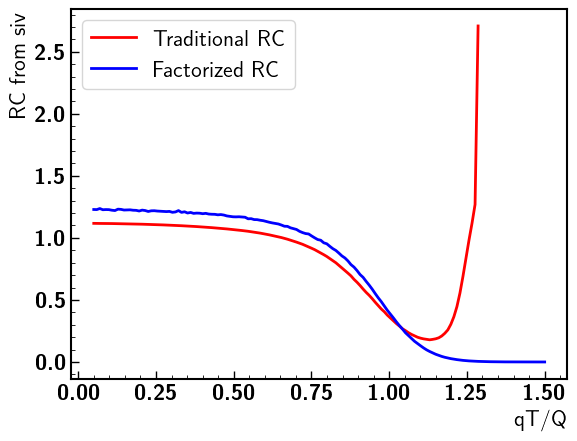

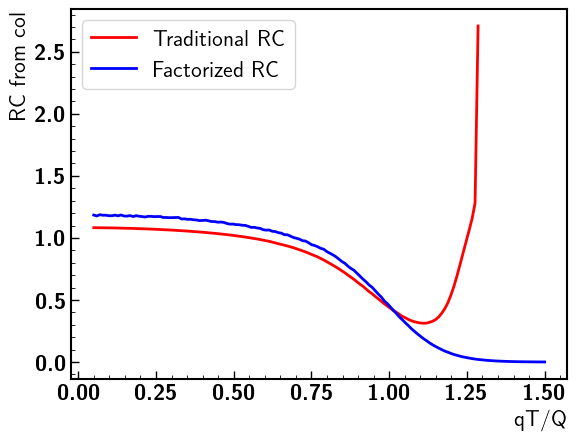

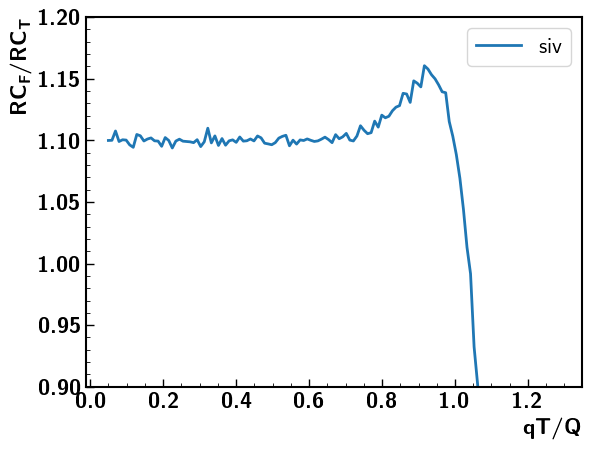

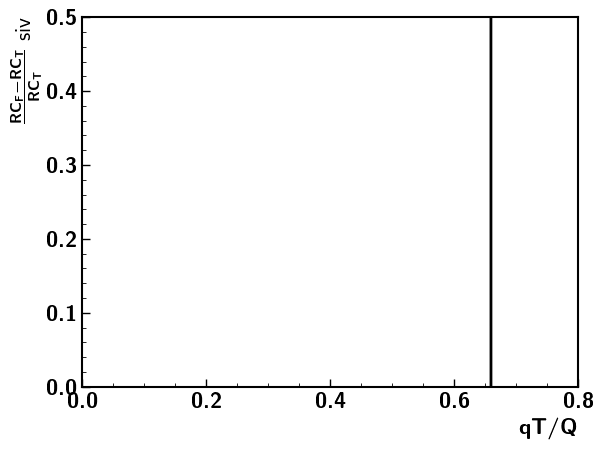

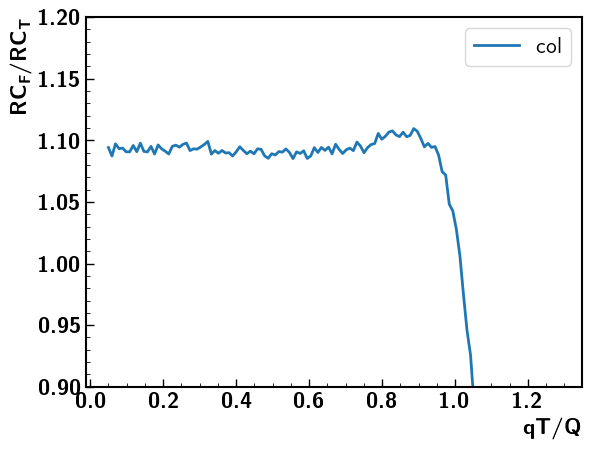

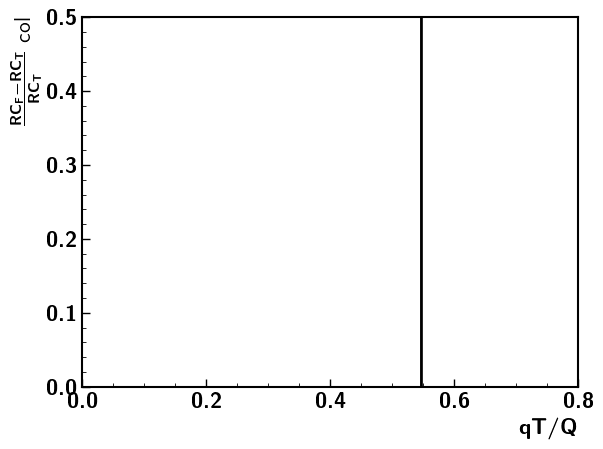

In [71]:
T_bn_qtQ_jlab3 = df_T_jlab3_siv['qt_to_Q'].to_list()
T_bn_siv_jlab3 = df_T_jlab3_siv['sivers_bn'].to_list()
F_bn_qtQ_JLab_3 = df_F_JLab_3_siv_bn['qT_Q'].to_list()
F_bn_siv_JLab_3 = df_F_JLab_3_siv_bn['xs'].to_list()
T_rc_qtQ_jlab3 = df_T_jlab3_siv['qt_to_Q'].to_list()
T_rc_siv_jlab3 = df_T_jlab3_siv['sivers_rc'].to_list()
F_rc_qtQ_JLab_3 = df_F_JLab_3_siv_rc['qT_Q'].to_list()
F_rc_siv_JLab_3 = df_F_JLab_3_siv_rc['xs'].to_list()
RC_F_siv_jlab3 = np.asarray(F_bn_siv_JLab_3)/np.asarray(F_rc_siv_JLab_3)
RC_T_siv_jlab3 = np.asarray(T_bn_siv_jlab3)/np.asarray(T_rc_siv_jlab3)
plt.plot(T_bn_qtQ_jlab3,RC_T_siv_jlab3,color='r',label='Traditional RC')
plt.plot(F_bn_qtQ_JLab_3,RC_F_siv_jlab3,color='b',label='Factorized RC')
plt.xlabel('qT/Q',fontsize =16)
plt.ylabel('RC from siv',fontsize =16)
plt.legend()
plt.savefig('results/compare/Fine/RCs_siv_both_jlab3.pdf')

plt.figure()
T_bn_qtQ_jlab3 = df_T_jlab3_col['qt_to_Q'].to_list()
T_bn_col_jlab3 = df_T_jlab3_col['collins_bn'].to_list()
F_bn_qtQ_JLab_3 = df_F_JLab_3_col_bn['qT_Q'].to_list()
F_bn_col_JLab_3 = df_F_JLab_3_col_bn['xs'].to_list()
T_rc_qtQ_jlab3 = df_T_jlab3_col['qt_to_Q'].to_list()
T_rc_col_jlab3 = df_T_jlab3_col['collins_rc'].to_list()
F_rc_qtQ_JLab_3 = df_F_JLab_3_col_rc['qT_Q'].to_list()
F_rc_col_JLab_3 = df_F_JLab_3_col_rc['xs'].to_list()
RC_F_col_jlab3 = np.asarray(F_bn_col_JLab_3)/np.asarray(F_rc_col_JLab_3)
RC_T_col_jlab3 = np.asarray(T_bn_col_jlab3)/np.asarray(T_rc_col_jlab3)
plt.plot(T_bn_qtQ_jlab3,RC_T_col_jlab3,color='r',label='Traditional RC')
plt.plot(F_bn_qtQ_JLab_3,RC_F_col_jlab3,color='b',label='Factorized RC')
plt.xlabel('qT/Q',fontsize =16)
plt.ylabel('RC from col',fontsize =16)
plt.legend()
plt.savefig('results/compare/Fine/RCs_col_both_jlab3.pdf')

plt.figure()
RC_FT_siv = RC_F_siv_jlab3/RC_T_siv_jlab3
plt.plot(T_bn_qtQ_jlab3,RC_FT_siv,label='siv')
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$RC_F/RC_T$',fontsize =16)
plt.legend()
plt.ylim(0.9,1.2)
plt.savefig('results/compare/Fine/compare_RC_siv_jlab3.pdf')
plt.figure()
plt.plot(T_bn_qtQ_jlab3,(np.asarray(RC_F_siv_jlab3)-np.asarray(RC_T_siv_jlab3))/(np.asarray(RC_T_siv_jlab3)-np.asarray(1)),color = 'black')
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel(r'$\frac{RC_F-RC_T}{RC_T}$ siv',fontsize=16)
plt.ylim(0,0.5)
plt.xlim(0,0.8)
plt.savefig('results/compare/Fine/compare_RC_with1_siv_jlab3.pdf')
plt.figure()
RC_FT_col = RC_F_col_jlab3/RC_T_col_jlab3
plt.plot(T_bn_qtQ_jlab3,RC_FT_col,label='col')
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel('$RC_F/RC_T$',fontsize =16)
plt.legend()
plt.ylim(0.9,1.2)
plt.savefig('results/compare/Fine/compare_RC_col_jlab3.pdf')
plt.figure()
plt.plot(T_bn_qtQ_jlab3,(np.asarray(RC_F_col_jlab3)-np.asarray(RC_T_col_jlab3))/(np.asarray(RC_T_col_jlab3)-np.asarray(1)),color = 'black')
plt.xlabel('$qT/Q$',fontsize=16)
plt.ylabel(r'$\frac{RC_F-RC_T}{RC_T}$ col',fontsize=16)
plt.ylim(0,0.5)
plt.xlim(0,0.8)
plt.savefig('results/compare/Fine/compare_RC_with1_col_jlab3.pdf')

In [72]:
print(np.array(eval(str([0.7,0.8]))))


[0.7 0.8]


In [73]:
print(np.array([0,1]))

[0 1]
